In [59]:
import pandas as pd

# Charger le fichier CSV
file_path = r"C:\INSEEDS\PROJET\STAT DESC\Student_Depression.csv"
df = pd.read_csv(file_path)
# Suppression de la colonne "id"
df.drop(columns=['id'], inplace=True)
# Aperçu des premières lignes
df.head()


sexe   age          ville profession  pression_academique  \
0    Male  33.0  Visakhapatnam    Student                  5.0   
1  Female  24.0      Bangalore    Student                  2.0   
2    Male  31.0       Srinagar    Student                  3.0   
3  Female  28.0       Varanasi    Student                  3.0   
4  Female  25.0         Jaipur    Student                  4.0   

   pression_liee_au_travail  moyenne_notes  satisfaction_etudes  \
0                       0.0           8.97                  2.0   
1                       0.0           5.90                  5.0   
2                       0.0           7.03                  5.0   
3                       0.0           5.59                  2.0   
4                       0.0           8.13                  3.0   

    satisfaction_travail      duree_sommeil habitudes_alimentaires  \
0                    0.0          5-6 hours                Healthy   
1                    0.0          5-6 hours               Moderate   
2                    0.0  Less than 5 hours                Healthy   
3                    0.0          7-8 hours               Moderate   
4                    0.0          5-6 hours               Moderate   

  diplome_suivi pensees_suicidaire  nombre_heure_travail_etude  \
0       B.Pharm                Yes                         3.0   
1           BSc                 No                         3.0   
2            BA                 No                         9.0   
3           BCA                Yes                         4.0   
4        M.Tech                Yes                         1.0   

   stress_financier antecedants_familiaux_maladie_mentale  depression  
0               1.0                                    No           1  
1               2.0                                   Yes           0  
2               1.0                                   Yes           0  
3               5.0                                   Yes           1  
4               1.0                                    No           0

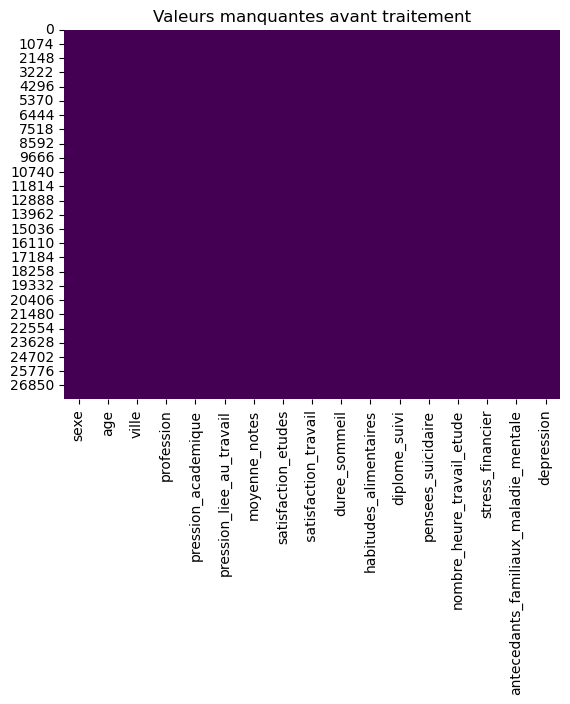

In [63]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualisation des valeurs manquantes
sns.heatmap(df.isnull(), cbar=False, cmap="viridis")
plt.title("Valeurs manquantes avant traitement")
plt.show()

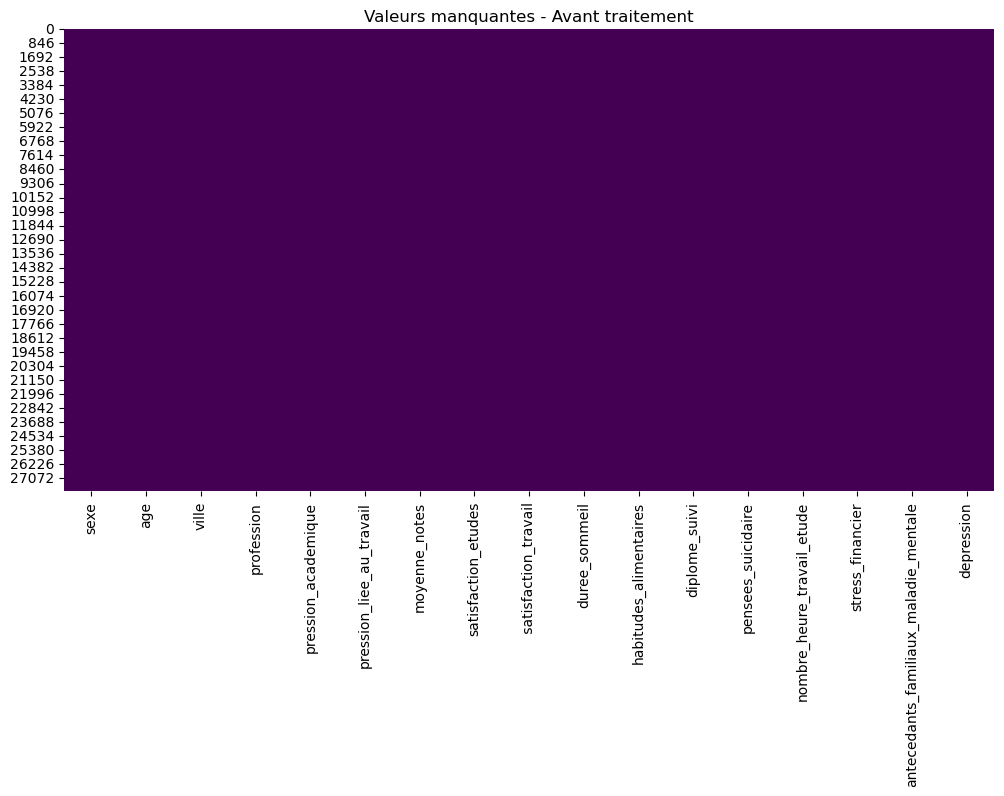

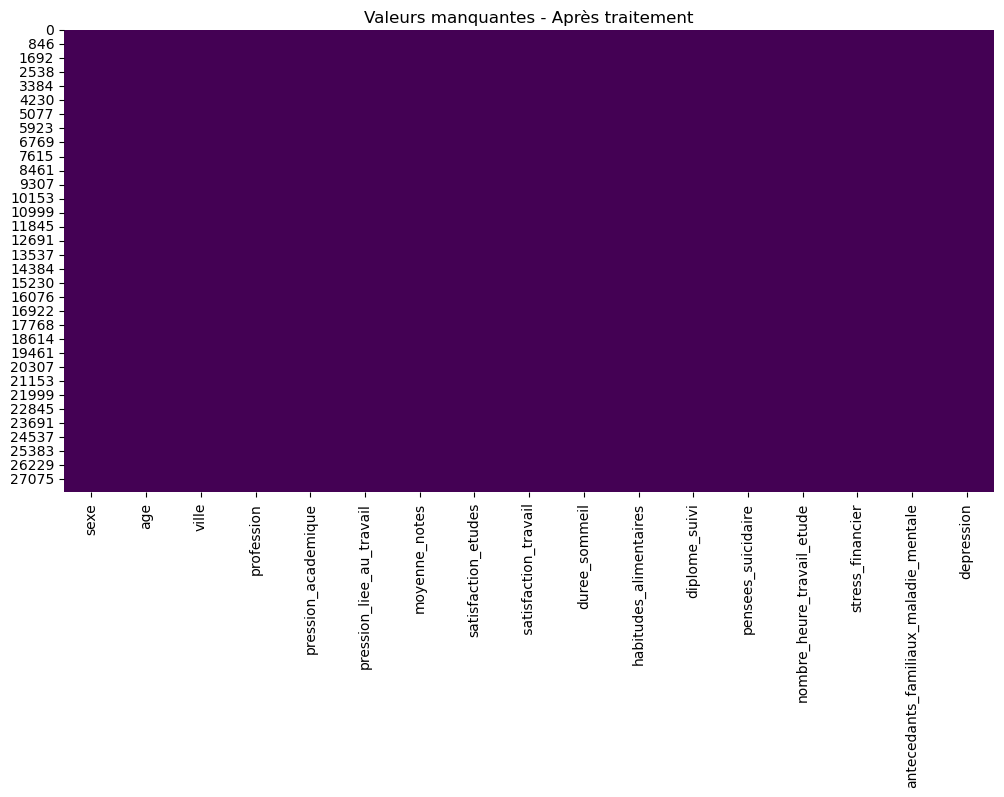

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualisation des valeurs manquantes
plt.figure(figsize=(12,6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Valeurs manquantes - Avant traitement")
plt.show()

# Suppression ou imputation si <5%
df = df.dropna(thresh=df.shape[0]*0.95, axis=1)  # on garde si >=95% de valeurs présentes
df = df.dropna()  # ou bien .fillna(...) selon la logique métier

# Visualisation après traitement
plt.figure(figsize=(12,6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Valeurs manquantes - Après traitement")
plt.show()


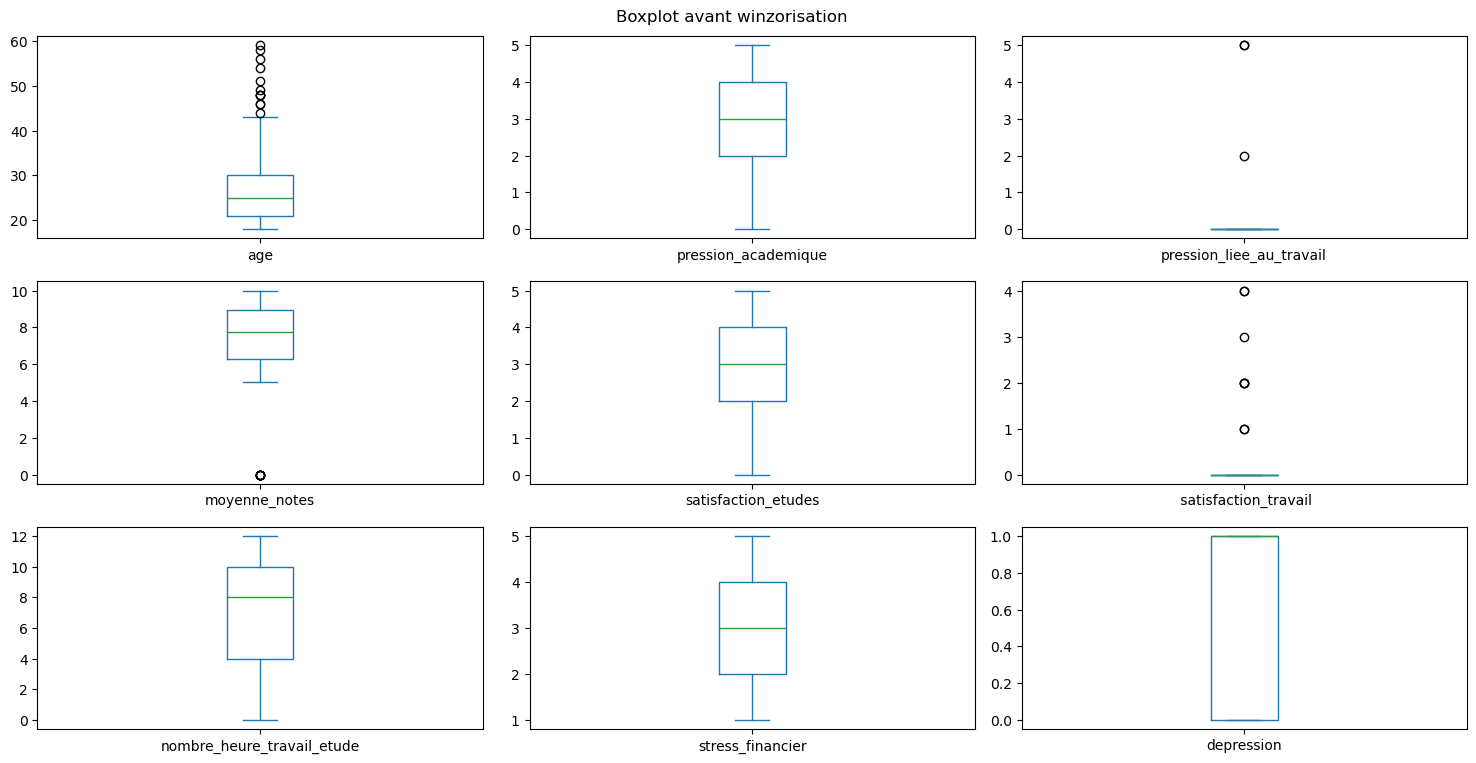

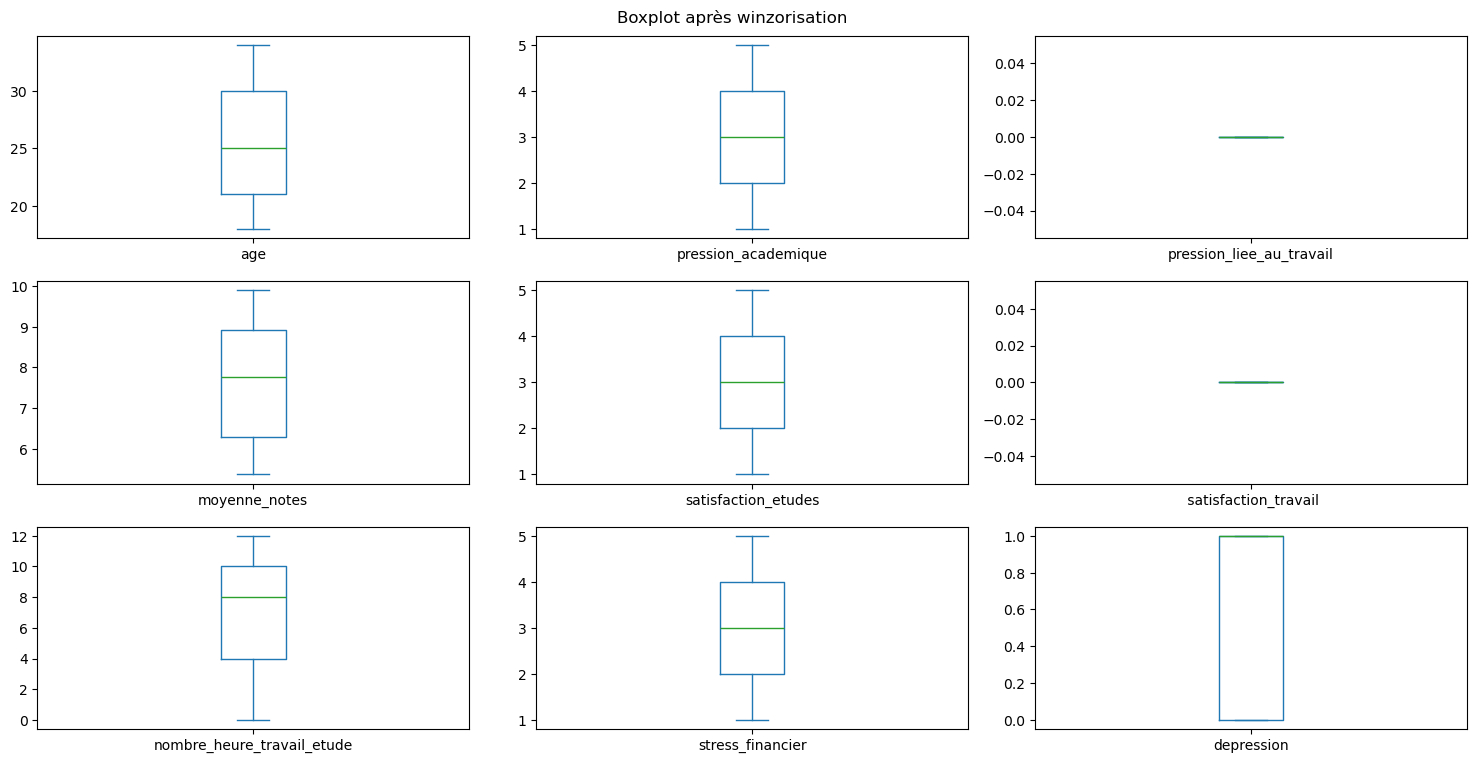

In [13]:
from scipy.stats.mstats import winsorize

# Variables quantitatives
quant_vars = df.select_dtypes(include=['float64', 'int64']).columns

# Boxplot avant traitement
df[quant_vars].plot(kind='box', subplots=True, layout=(len(quant_vars)//3+1, 3), figsize=(15,10), sharex=False)
plt.suptitle("Boxplot avant winzorisation")
plt.tight_layout()
plt.show()

# Winzorisation (à 5%)
for var in quant_vars:
    df[var] = winsorize(df[var], limits=[0.05, 0.05])

# Boxplot après traitement
df[quant_vars].plot(kind='box', subplots=True, layout=(len(quant_vars)//3+1, 3), figsize=(15,10), sharex=False)
plt.suptitle("Boxplot après winzorisation")
plt.tight_layout()
plt.show()


In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import kurtosis, skew



# Sélection des variables quantitatives (automatique ou manuelle si besoin)
quanti_vars = df.select_dtypes(include=['float64', 'int64']).columns.tolist()


print("Variables quantitatives :", quanti_vars)


Variables quantitatives : ['age', 'pression_academique', 'pression_liee_au_travail', 'moyenne_notes', 'satisfaction_etudes', ' satisfaction_travail', 'nombre_heure_travail_etude', 'stress_financier', 'depression']


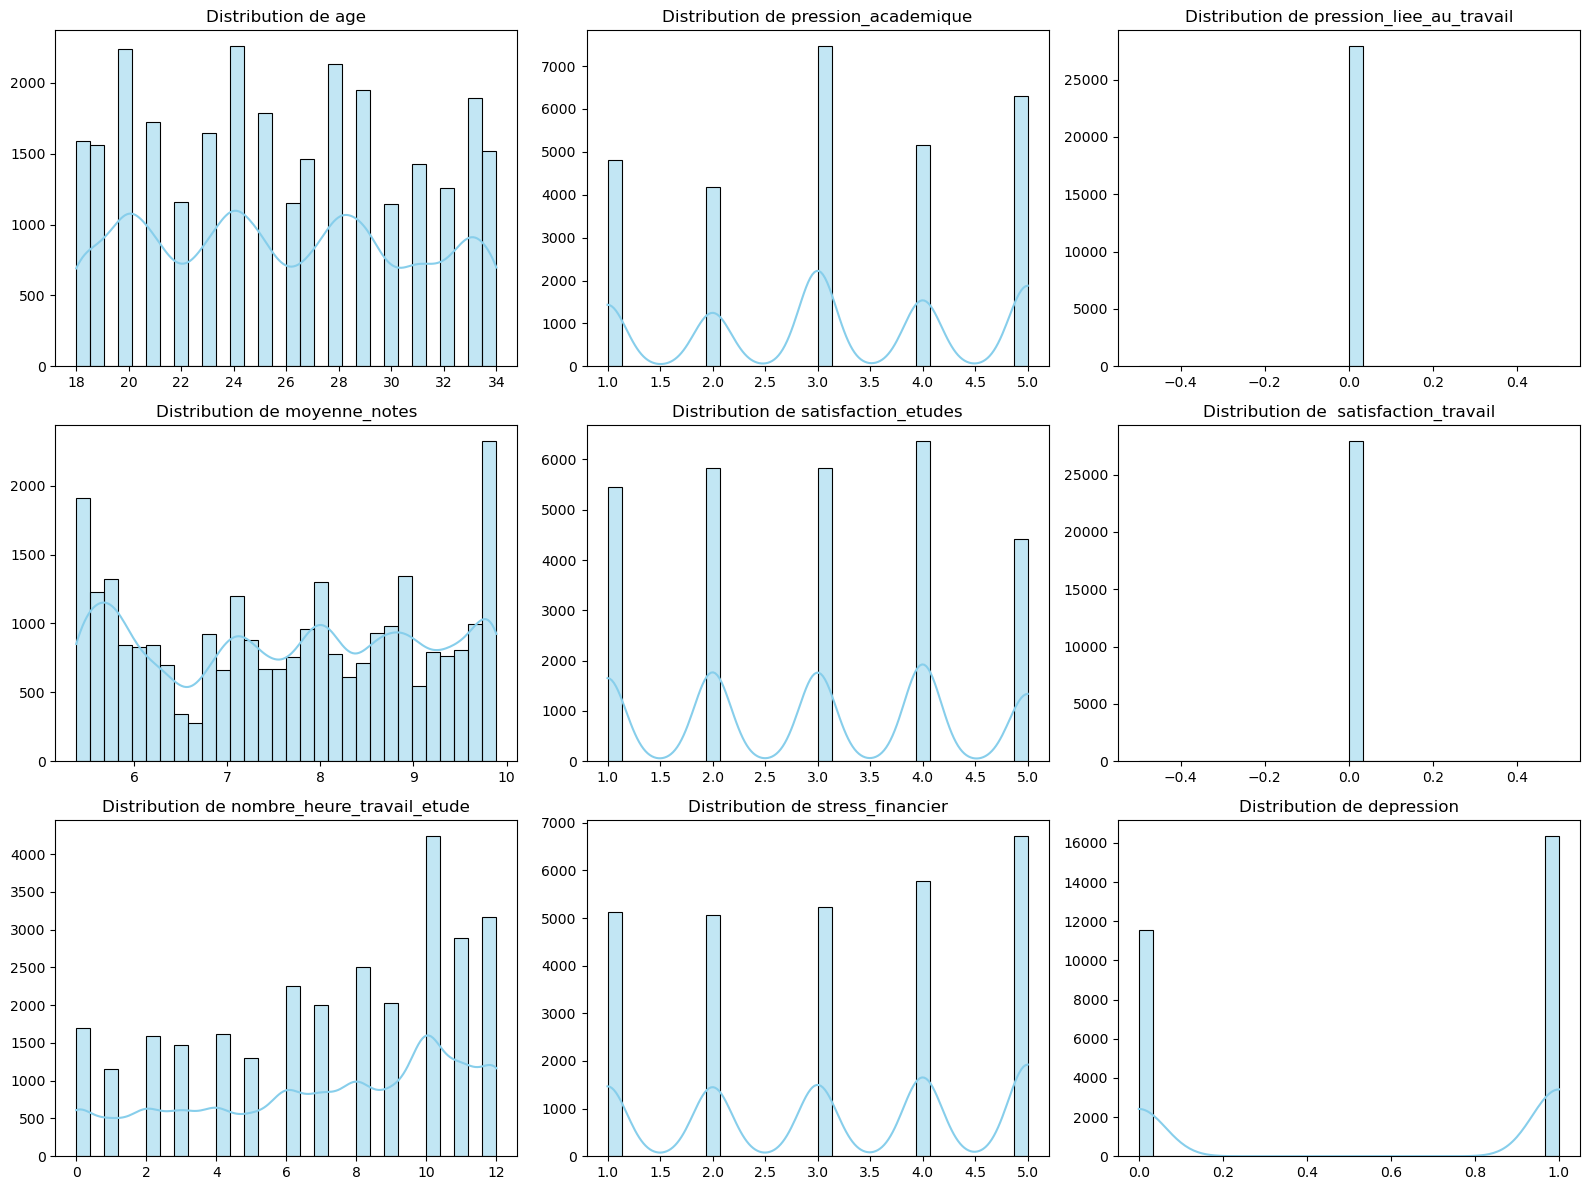

In [21]:
# Taille du graphique
plt.figure(figsize=(16, 12))

# Afficher les distributions
for i, col in enumerate(quanti_vars):
    plt.subplot(3, 3, i + 1)
    sns.histplot(df[col], kde=True, bins=30, color='skyblue')
    plt.title(f'Distribution de {col}')
    plt.xlabel('')
    plt.ylabel('')

plt.tight_layout()
plt.show()


In [23]:
# Fonction pour calculer les stats demandées
def statistiques_perso(df, variables):
    data = []
    for var in variables:
        stats = {
            'Variable': var,
            'Moyenne': df[var].mean(),
            'Médiane': df[var].median(),
            'Min': df[var].min(),
            'Max': df[var].max(),
            'Écart-type': df[var].std(),
            'Variance': df[var].var(),
            'Asymétrie (Skew)': skew(df[var].dropna()),
            'Kurtosis': kurtosis(df[var].dropna())
        }
        data.append(stats)
    return pd.DataFrame(data)

# Résumé des stats
resume_stats = statistiques_perso(df, quanti_vars)
print(resume_stats)


                     Variable    Moyenne  Médiane    Min    Max  Écart-type  \
0                         age  25.810237    25.00  18.00  34.00    4.869893   
1         pression_academique   3.141659     3.00   1.00   5.00    1.380845   
2    pression_liee_au_travail   0.000000     0.00   0.00   0.00    0.000000   
3               moyenne_notes   7.663355     7.77   5.38   9.89    1.446709   
4         satisfaction_etudes   2.944333     3.00   1.00   5.00    1.360478   
5        satisfaction_travail   0.000000     0.00   0.00   0.00    0.000000   
6  nombre_heure_travail_etude   7.156570     8.00   0.00  12.00    3.707598   
7            stress_financier   3.139867     3.00   1.00   5.00    1.437347   
8                  depression   0.585526     1.00   0.00   1.00    0.492640   

    Variance  Asymétrie (Skew)  Kurtosis  
0  23.715862          0.066161 -1.184761  
1   1.906734         -0.133572 -1.164505  
2   0.000000               NaN       NaN  
3   2.092968         -0.054507 -1.273

In [25]:
df = df.drop(columns=['pression_lie_travail', 'satisfaction_travail'], errors='ignore')


In [31]:
# Quantitatives
quant_vars = df.select_dtypes(include=['float64', 'int64']).columns.tolist()



# Qualitatives
qual_vars = df.select_dtypes(include='object').columns.tolist()


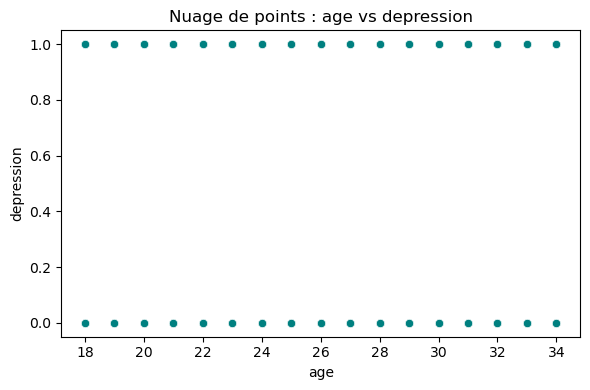


--- Corrélations entre age et score_depression ---
Pearson : r = -0.226, p-value = 0.0000
Spearman : rho = -0.225, p-value = 0.0000
Kendall : tau = -0.190, p-value = 0.0000



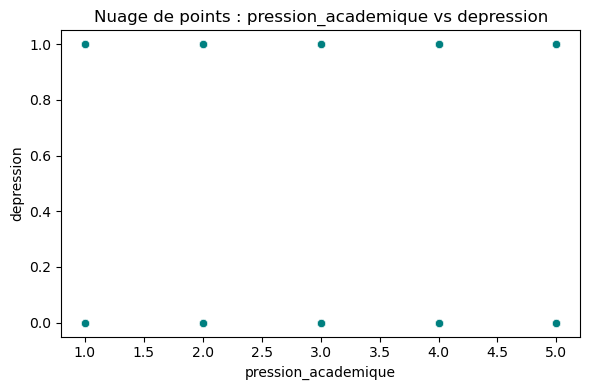


--- Corrélations entre pression_academique et score_depression ---
Pearson : r = 0.475, p-value = 0.0000
Spearman : rho = 0.472, p-value = 0.0000
Kendall : tau = 0.424, p-value = 0.0000



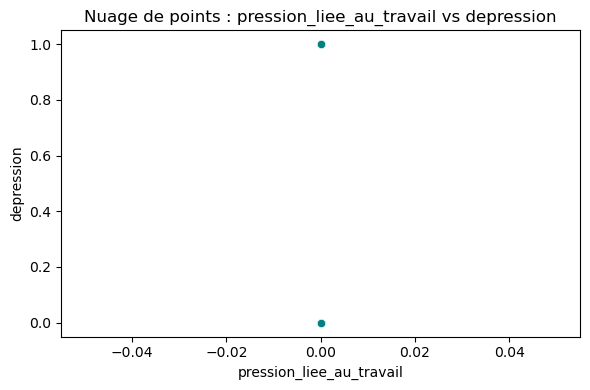


--- Corrélations entre pression_liee_au_travail et score_depression ---
Pearson : r = nan, p-value = nan
Spearman : rho = nan, p-value = nan
Kendall : tau = nan, p-value = nan



C:\Users\KABA\AppData\Local\Temp\ipykernel_16956\1356926417.py:16: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  pearson_corr, p1 = pearsonr(df[var], df["depression"])
C:\Users\KABA\AppData\Local\Temp\ipykernel_16956\1356926417.py:17: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  spearman_corr, p2 = spearmanr(df[var], df["depression"])


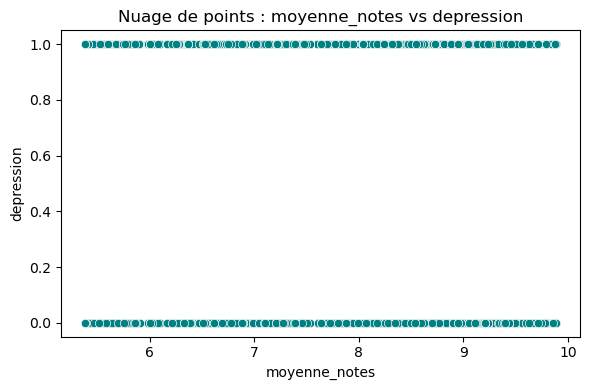


--- Corrélations entre moyenne_notes et score_depression ---
Pearson : r = 0.022, p-value = 0.0002
Spearman : rho = 0.022, p-value = 0.0003
Kendall : tau = 0.018, p-value = 0.0003



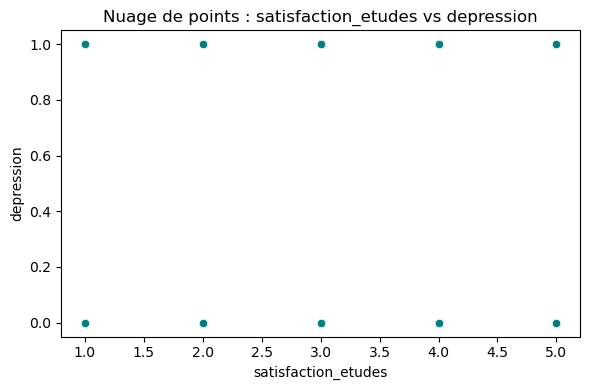


--- Corrélations entre satisfaction_etudes et score_depression ---
Pearson : r = -0.168, p-value = 0.0000
Spearman : rho = -0.168, p-value = 0.0000
Kendall : tau = -0.151, p-value = 0.0000



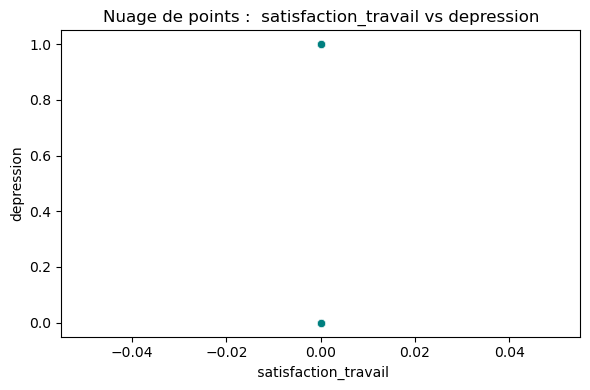


--- Corrélations entre  satisfaction_travail et score_depression ---
Pearson : r = nan, p-value = nan
Spearman : rho = nan, p-value = nan
Kendall : tau = nan, p-value = nan



C:\Users\KABA\AppData\Local\Temp\ipykernel_16956\1356926417.py:16: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  pearson_corr, p1 = pearsonr(df[var], df["depression"])
C:\Users\KABA\AppData\Local\Temp\ipykernel_16956\1356926417.py:17: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  spearman_corr, p2 = spearmanr(df[var], df["depression"])


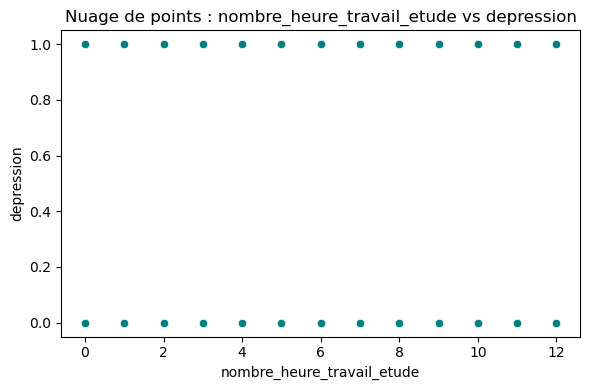


--- Corrélations entre nombre_heure_travail_etude et score_depression ---
Pearson : r = 0.209, p-value = 0.0000
Spearman : rho = 0.201, p-value = 0.0000
Kendall : tau = 0.171, p-value = 0.0000



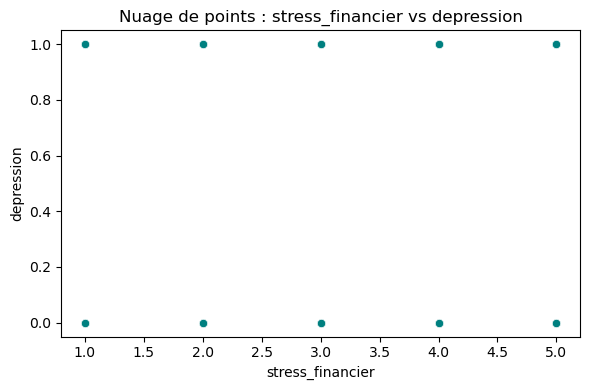


--- Corrélations entre stress_financier et score_depression ---
Pearson : r = 0.364, p-value = 0.0000
Spearman : rho = 0.363, p-value = 0.0000
Kendall : tau = 0.325, p-value = 0.0000



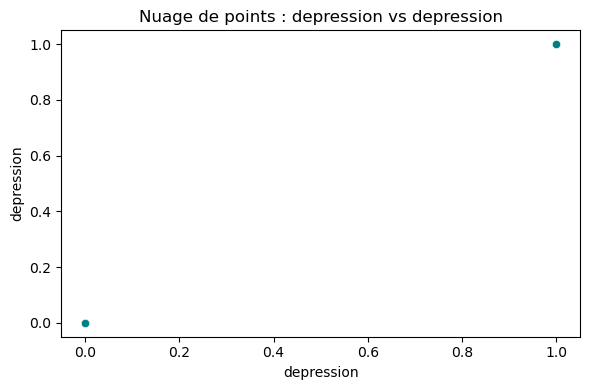


--- Corrélations entre depression et score_depression ---
Pearson : r = 1.000, p-value = 0.0000
Spearman : rho = 1.000, p-value = 0.0000
Kendall : tau = 1.000, p-value = 0.0000



In [35]:
from scipy.stats import pearsonr, spearmanr, kendalltau
import seaborn as sns
import matplotlib.pyplot as plt

for var in quant_vars:
    plt.figure(figsize=(6,4))
    sns.scatterplot(x=df[var], y=df["depression"], color='teal')
    plt.title(f"Nuage de points : {var} vs depression")
    plt.xlabel(var)
    plt.ylabel("depression")
    plt.tight_layout()
    plt.show()
    
    # Tests de corrélation
    print(f"\n--- Corrélations entre {var} et score_depression ---")
    pearson_corr, p1 = pearsonr(df[var], df["depression"])
    spearman_corr, p2 = spearmanr(df[var], df["depression"])
    kendall_corr, p3 = kendalltau(df[var], df["depression"])
    
    print(f"Pearson : r = {pearson_corr:.3f}, p-value = {p1:.4f}")
    print(f"Spearman : rho = {spearman_corr:.3f}, p-value = {p2:.4f}")
    print(f"Kendall : tau = {kendall_corr:.3f}, p-value = {p3:.4f}\n")


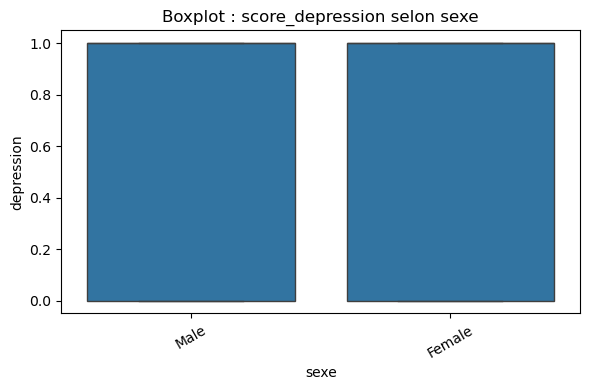


--- Test ANOVA ou Kruskal-Wallis pour sexe ---
ANOVA : stat = 0.092, p-value = 0.7613


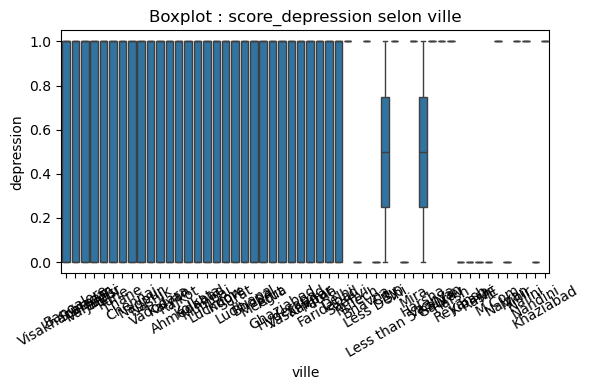


--- Test ANOVA ou Kruskal-Wallis pour ville ---
ANOVA : stat = 3.718, p-value = 0.0000


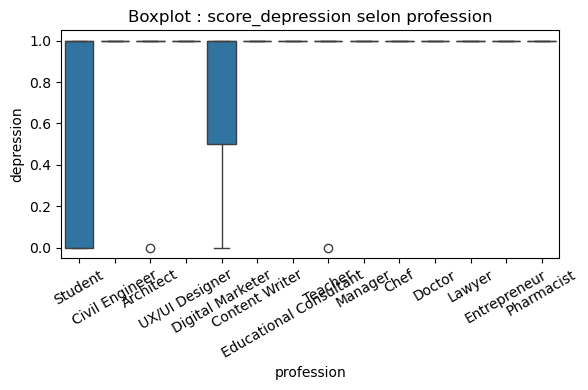


--- Test ANOVA ou Kruskal-Wallis pour profession ---
ANOVA : stat = 1.099, p-value = 0.3540


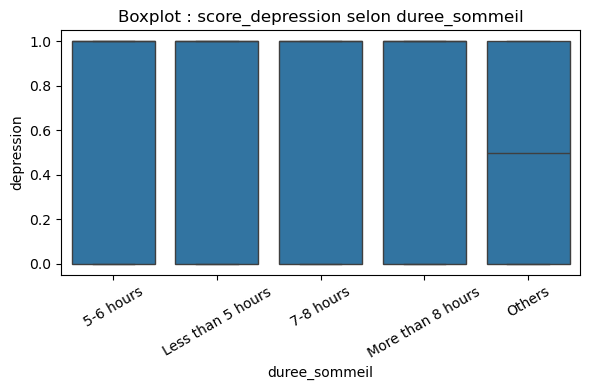


--- Test ANOVA ou Kruskal-Wallis pour duree_sommeil ---
ANOVA : stat = 69.966, p-value = 0.0000


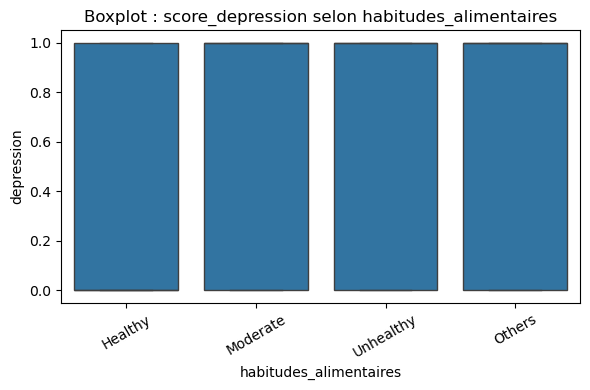


--- Test ANOVA ou Kruskal-Wallis pour habitudes_alimentaires ---
ANOVA : stat = 419.108, p-value = 0.0000


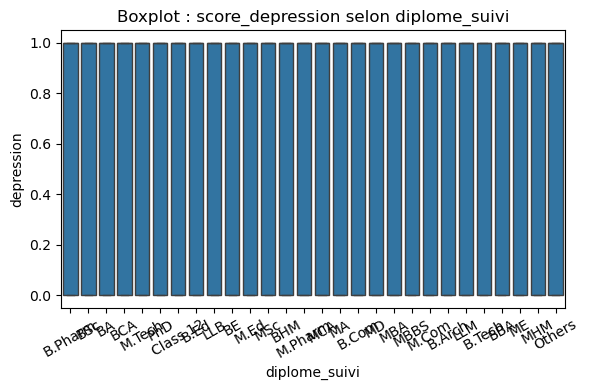


--- Test ANOVA ou Kruskal-Wallis pour diplome_suivi ---
ANOVA : stat = 20.036, p-value = 0.0000


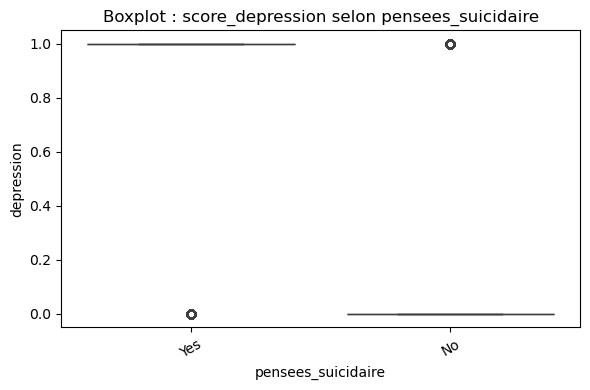


--- Test ANOVA ou Kruskal-Wallis pour pensees_suicidaire ---
ANOVA : stat = 11866.381, p-value = 0.0000


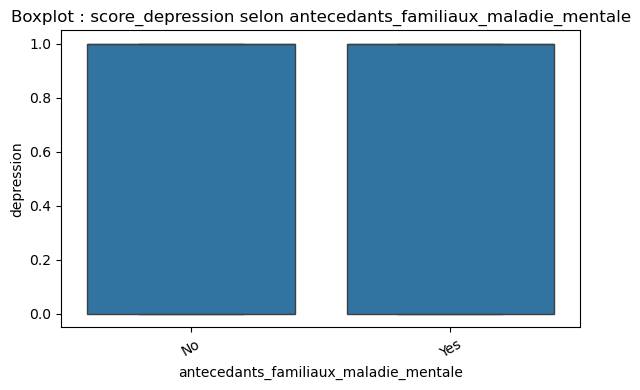


--- Test ANOVA ou Kruskal-Wallis pour antecedants_familiaux_maladie_mentale ---
ANOVA : stat = 80.236, p-value = 0.0000


In [37]:
from scipy.stats import kruskal
from scipy.stats import f_oneway
import seaborn as sns

for qual in qual_vars:
    plt.figure(figsize=(6,4))
    sns.boxplot(x=df[qual], y=df["depression"])
    plt.title(f"Boxplot : score_depression selon {qual}")
    plt.xticks(rotation=30)
    plt.tight_layout()
    plt.show()
    
    # Suppression des NaN
    groups = [group.dropna() for name, group in df.groupby(qual)["depression"]]
    
    # Vérification des effectifs
    print(f"\n--- Test ANOVA ou Kruskal-Wallis pour {qual} ---")
    try:
        stat, p = f_oneway(*groups)
        print(f"ANOVA : stat = {stat:.3f}, p-value = {p:.4f}")
    except:
        stat, p = kruskal(*groups)
        print(f"Kruskal-Wallis : stat = {stat:.3f}, p-value = {p:.4f}")



--- sexe vs ville ---
ville   3.0  Agra  Ahmedabad  Bangalore  Bhavna  Bhopal  Chennai  City  Delhi  \
sexe                                                                            
Female    1   446        404        380       0     421      494     2    357   
Male      0   648        547        387       2     513      391     0    411   

ville   Faridabad  ...  Reyansh  Saanvi  Srinagar  Surat  Thane  Vaanya  \
sexe               ...                                                    
Female        212  ...        0       0       661    491    527       0   
Male          249  ...        1       2       711    587    612       1   

ville   Vadodara  Varanasi  Vasai-Virar  Visakhapatnam  
sexe                                                    
Female       399       290          718            486  
Male         295       394          572            483  

[2 rows x 52 columns]


C:\Users\KABA\AppData\Local\Temp\ipykernel_16956\533055273.py:15: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


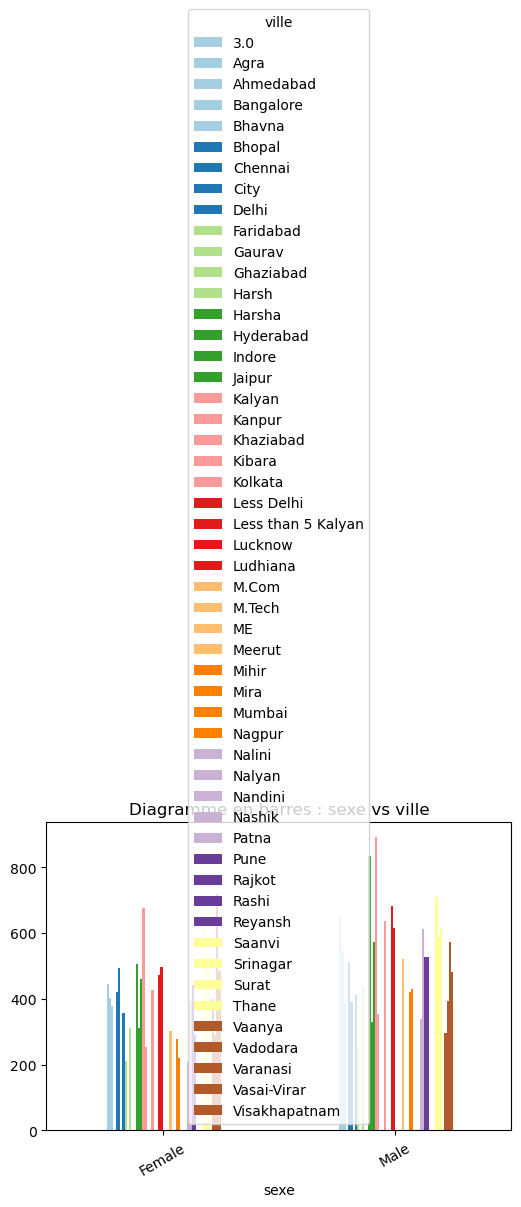

Khi-2 : stat = 378.170, p-value = 0.0000
Condition Cochran respectée ? False

--- sexe vs profession ---
profession  Architect  Chef  Civil Engineer  Content Writer  Digital Marketer  \
sexe                                                                            
Female              5     2               0               1                 2   
Male                3     0               1               1                 1   

profession  Doctor  Educational Consultant  Entrepreneur  Lawyer  Manager  \
sexe                                                                        
Female           1                       0             1       0        0   
Male             1                       1             0       1        1   

profession  Pharmacist  Student  Teacher  UX/UI Designer  
sexe                                                      
Female               0    12339        0               1  
Male                 2    15528        6               0  


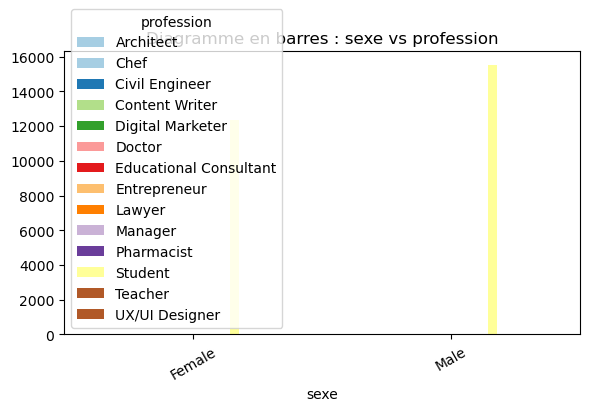

Khi-2 : stat = 16.309, p-value = 0.2329
Condition Cochran respectée ? False

--- sexe vs duree_sommeil ---
duree_sommeil  5-6 hours  7-8 hours  Less than 5 hours  More than 8 hours  \
sexe                                                                        
Female              2787       3291               3628               2637   
Male                3394       4055               4681               3407   

duree_sommeil  Others  
sexe                   
Female              9  
Male                9  


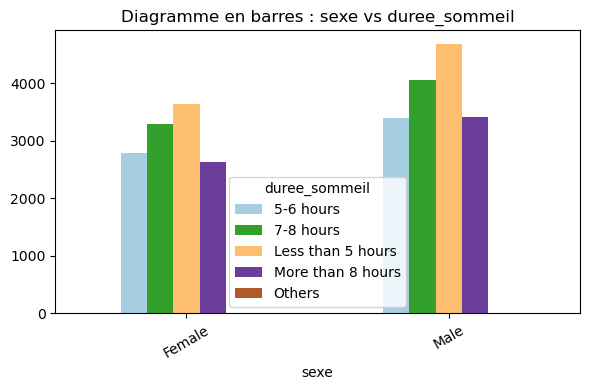

Khi-2 : stat = 5.001, p-value = 0.2872
Condition Cochran respectée ? True

--- sexe vs habitudes_alimentaires ---
habitudes_alimentaires  Healthy  Moderate  Others  Unhealthy
sexe                                                        
Female                     3622      4582       4       4144
Male                       4027      5339       8       6172


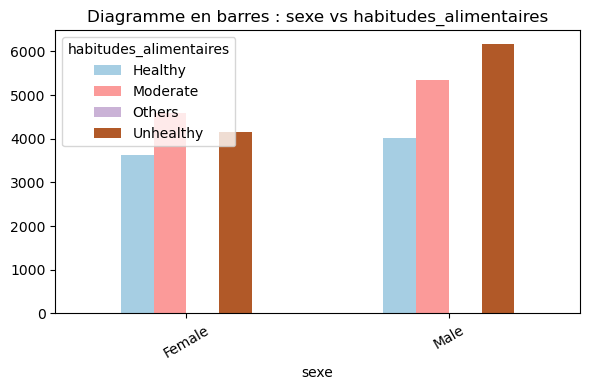

Khi-2 : stat = 115.050, p-value = 0.0000
Condition Cochran respectée ? True

--- sexe vs diplome_suivi ---
diplome_suivi  B.Arch  B.Com  B.Ed  B.Pharm  B.Tech   BA  BBA  BCA   BE  BHM  \
sexe                                                                           
Female            730    666   763      371     386  305  331  610  300  586   
Male              748    840  1103      439     766  295  365  822  313  339   

diplome_suivi  ...   MA  MBA  MBBS  MCA   MD  ME  MHM  MSc  Others  PhD  
sexe           ...                                                       
Female         ...  233  268   351  456  202  89   96  478      16  257  
Male           ...  311  294   344  588  370  96   95  712      19  265  

[2 rows x 28 columns]


C:\Users\KABA\AppData\Local\Temp\ipykernel_16956\533055273.py:15: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


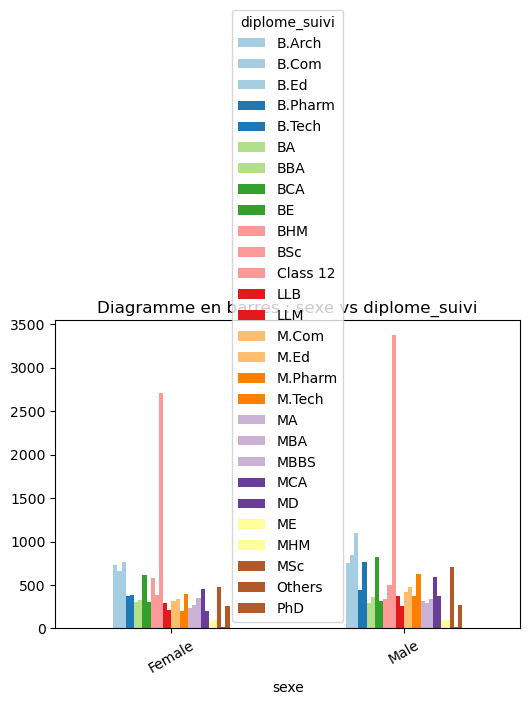

Khi-2 : stat = 321.812, p-value = 0.0000
Condition Cochran respectée ? True

--- sexe vs pensees_suicidaire ---
pensees_suicidaire    No   Yes
sexe                          
Female              4526  7826
Male                5716  9830


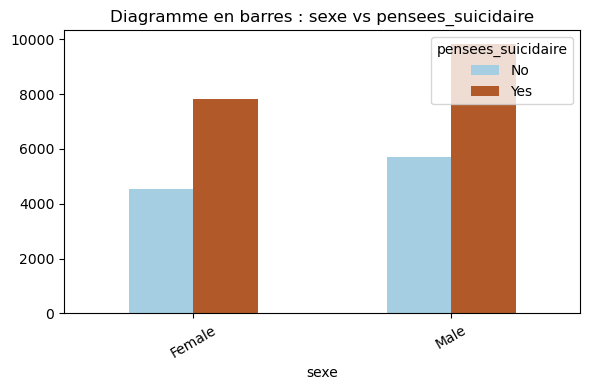

Khi-2 : stat = 0.042, p-value = 0.8374
Condition Cochran respectée ? True

--- sexe vs antecedants_familiaux_maladie_mentale ---
antecedants_familiaux_maladie_mentale    No   Yes
sexe                                             
Female                                 6265  6087
Male                                   8132  7414


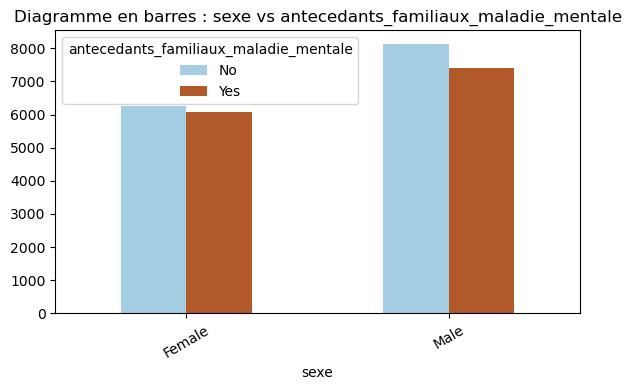

Khi-2 : stat = 6.893, p-value = 0.0087
Condition Cochran respectée ? True

--- ville vs sexe ---
sexe                Female  Male
ville                           
3.0                      1     0
Agra                   446   648
Ahmedabad              404   547
Bangalore              380   387
Bhavna                   0     2
Bhopal                 421   513
Chennai                494   391
City                     2     0
Delhi                  357   411
Faridabad              212   249
Gaurav                   1     0
Ghaziabad              311   434
Harsh                    1     0
Harsha                   0     2
Hyderabad              505   834
Indore                 312   331
Jaipur                 462   574
Kalyan                 678   892
Kanpur                 255   354
Khaziabad                1     0
Kibara                   0     1
Kolkata                427   638
Less Delhi               1     0
Less than 5 Kalyan       0     1
Lucknow                473   682
Ludhiana    

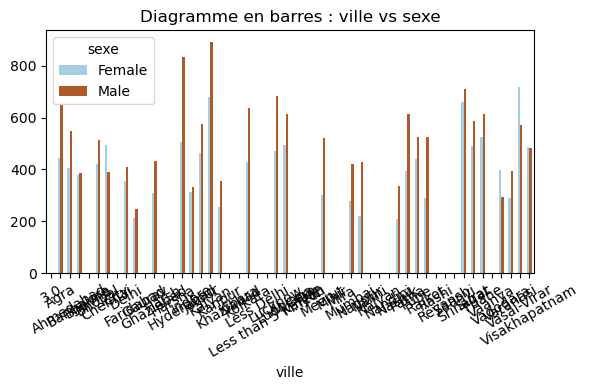

Khi-2 : stat = 378.170, p-value = 0.0000
Condition Cochran respectée ? False

--- ville vs profession ---
profession          Architect  Chef  Civil Engineer  Content Writer  \
ville                                                                 
3.0                         0     0               0               0   
Agra                        0     1               0               0   
Ahmedabad                   0     0               1               0   
Bangalore                   1     0               0               0   
Bhavna                      0     0               0               0   
Bhopal                      1     0               0               0   
Chennai                     0     0               0               0   
City                        0     0               0               0   
Delhi                       1     0               0               0   
Faridabad                   0     0               0               0   
Gaurav                      0     0       

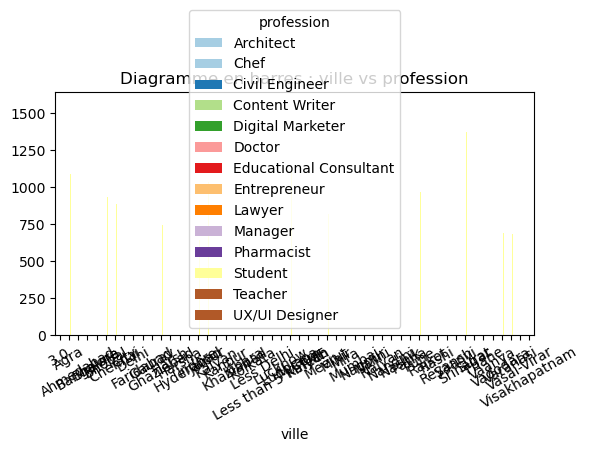

Khi-2 : stat = 383.062, p-value = 1.0000
Condition Cochran respectée ? False

--- ville vs duree_sommeil ---
duree_sommeil       5-6 hours  7-8 hours  Less than 5 hours  \
ville                                                         
3.0                         0          1                  0   
Agra                      231        289                316   
Ahmedabad                 184        262                272   
Bangalore                 178        169                217   
Bhavna                      1          0                  1   
Bhopal                    237        256                248   
Chennai                   199        222                256   
City                        0          1                  1   
Delhi                     147        205                227   
Faridabad                 117        110                122   
Gaurav                      1          0                  0   
Ghaziabad                 152        201                233   
Harsh    

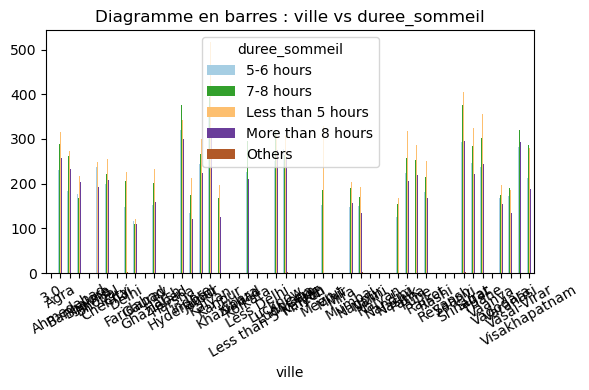

Khi-2 : stat = 260.956, p-value = 0.0043
Condition Cochran respectée ? False

--- ville vs habitudes_alimentaires ---
habitudes_alimentaires  Healthy  Moderate  Others  Unhealthy
ville                                                       
3.0                           0         0       0          1
Agra                        319       370       1        404
Ahmedabad                   235       322       2        392
Bangalore                   197       286       1        283
Bhavna                        1         1       0          0
Bhopal                      262       360       0        312
Chennai                     261       304       0        320
City                          1         0       0          1
Delhi                       224       225       0        319
Faridabad                   138       165       0        158
Gaurav                        0         0       0          1
Ghaziabad                   181       288       1        275
Harsh                       

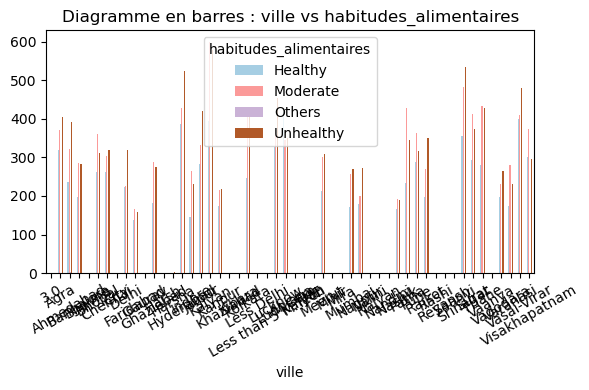

Khi-2 : stat = 319.907, p-value = 0.0000
Condition Cochran respectée ? False

--- ville vs diplome_suivi ---
diplome_suivi       B.Arch  B.Com  B.Ed  B.Pharm  B.Tech  BA  BBA  BCA  BE  \
ville                                                                        
3.0                      0      0     0        0       0   0    0    1   0   
Agra                    67     57    80       46      55  60   36   51  16   
Ahmedabad               95     39    62       13      35  12   17   34  27   
Bangalore               33     33    45       23      33  17   18   29  18   
Bhavna                   0      0     0        0       0   0    0    0   0   
Bhopal                  21     48    66       19      26   9   20   19  14   
Chennai                 22     47    30       23      29  20   23   59  29   
City                     0      0     0        0       0   0    0    0   0   
Delhi                   18     26    41       13      34  22   22   39  20   
Faridabad               14     26

C:\Users\KABA\AppData\Local\Temp\ipykernel_16956\533055273.py:15: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


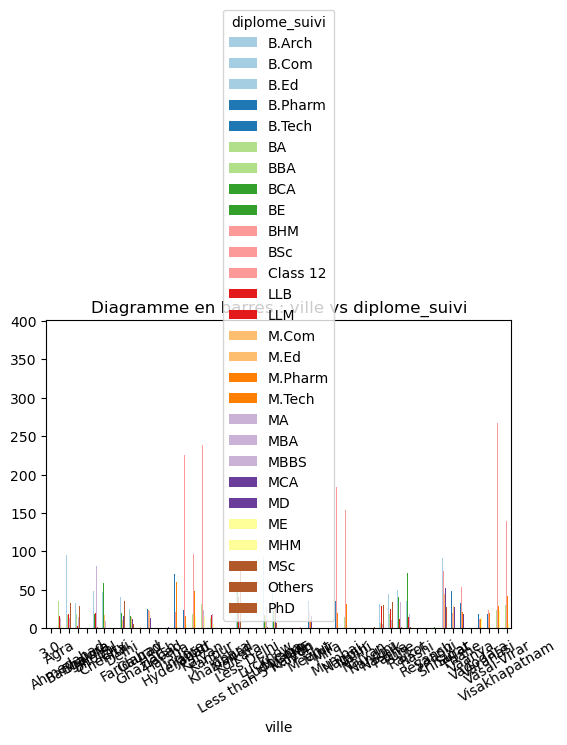

Khi-2 : stat = 4871.316, p-value = 0.0000
Condition Cochran respectée ? False

--- ville vs pensees_suicidaire ---
pensees_suicidaire   No   Yes
ville                        
3.0                   0     1
Agra                399   695
Ahmedabad           306   645
Bangalore           295   472
Bhavna                0     2
Bhopal              299   635
Chennai             347   538
City                  2     0
Delhi               310   458
Faridabad           161   300
Gaurav                0     1
Ghaziabad           288   457
Harsh                 0     1
Harsha                1     1
Hyderabad           430   909
Indore              244   399
Jaipur              407   629
Kalyan              563  1007
Kanpur              222   387
Khaziabad             0     1
Kibara                0     1
Kolkata             405   660
Less Delhi            1     0
Less than 5 Kalyan    1     0
Lucknow             468   687
Ludhiana            414   697
M.Com                 0     1
M.Tech         

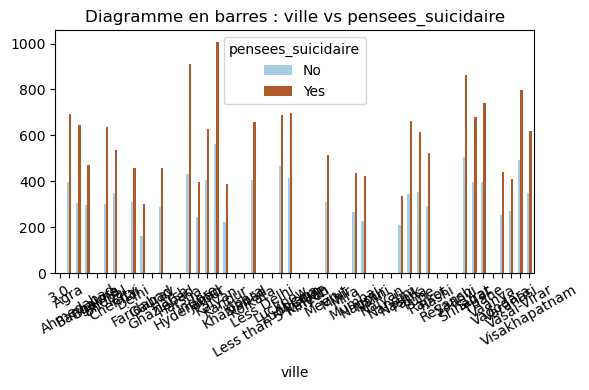

Khi-2 : stat = 84.933, p-value = 0.0020
Condition Cochran respectée ? False

--- ville vs antecedants_familiaux_maladie_mentale ---
antecedants_familiaux_maladie_mentale   No  Yes
ville                                          
3.0                                      1    0
Agra                                   572  522
Ahmedabad                              490  461
Bangalore                              391  376
Bhavna                                   1    1
Bhopal                                 458  476
Chennai                                458  427
City                                     1    1
Delhi                                  394  374
Faridabad                              234  227
Gaurav                                   0    1
Ghaziabad                              401  344
Harsh                                    0    1
Harsha                                   2    0
Hyderabad                              632  707
Indore                                 333  310
Jaip

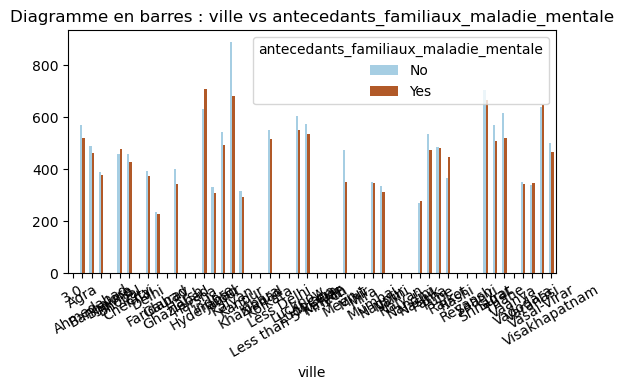

Khi-2 : stat = 87.349, p-value = 0.0012
Condition Cochran respectée ? False

--- profession vs sexe ---
sexe                    Female   Male
profession                           
Architect                    5      3
Chef                         2      0
Civil Engineer               0      1
Content Writer               1      1
Digital Marketer             2      1
Doctor                       1      1
Educational Consultant       0      1
Entrepreneur                 1      0
Lawyer                       0      1
Manager                      0      1
Pharmacist                   0      2
Student                  12339  15528
Teacher                      0      6
UX/UI Designer               1      0


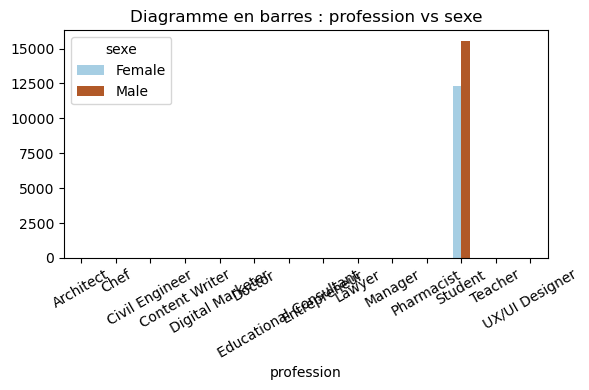

Khi-2 : stat = 16.309, p-value = 0.2329
Condition Cochran respectée ? False

--- profession vs ville ---
ville                   3.0  Agra  Ahmedabad  Bangalore  Bhavna  Bhopal  \
profession                                                                
Architect                 0     0          0          1       0       1   
Chef                      0     1          0          0       0       0   
Civil Engineer            0     0          1          0       0       0   
Content Writer            0     0          0          0       0       0   
Digital Marketer          0     0          1          0       0       0   
Doctor                    0     0          0          0       0       0   
Educational Consultant    0     1          0          0       0       0   
Entrepreneur              0     0          0          0       0       0   
Lawyer                    0     0          0          0       0       0   
Manager                   0     0          0          0       0       

C:\Users\KABA\AppData\Local\Temp\ipykernel_16956\533055273.py:15: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


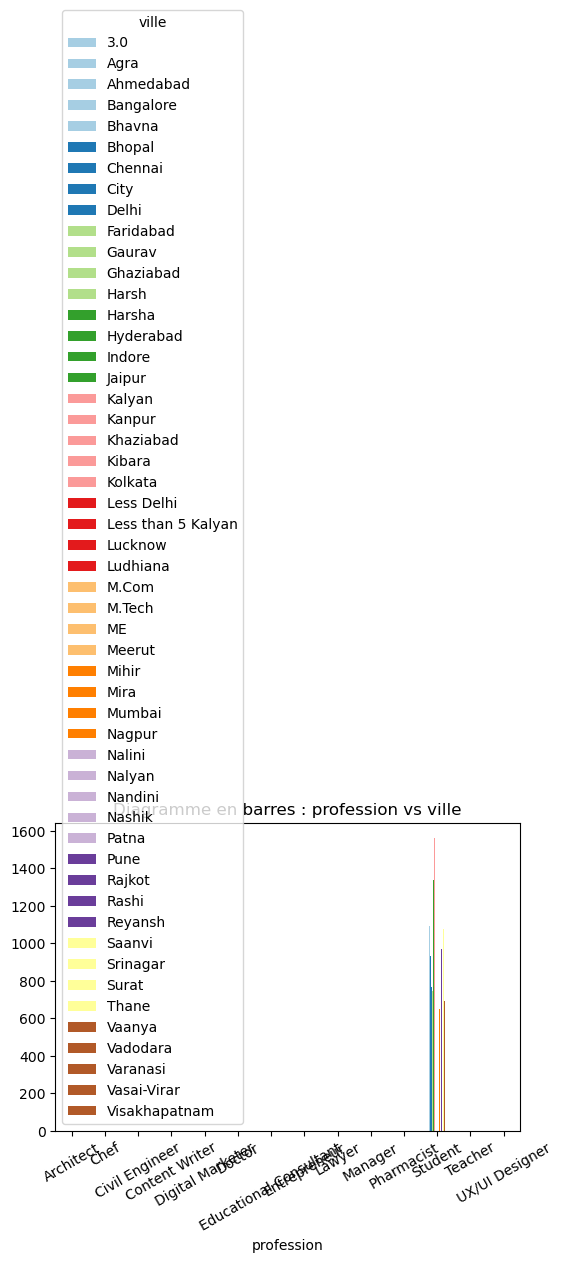

Khi-2 : stat = 383.062, p-value = 1.0000
Condition Cochran respectée ? False

--- profession vs duree_sommeil ---
duree_sommeil           5-6 hours  7-8 hours  Less than 5 hours  \
profession                                                        
Architect                       1          1                  2   
Chef                            0          2                  0   
Civil Engineer                  1          0                  0   
Content Writer                  1          1                  0   
Digital Marketer                1          0                  1   
Doctor                          0          0                  2   
Educational Consultant          0          1                  0   
Entrepreneur                    0          0                  1   
Lawyer                          0          0                  0   
Manager                         0          0                  0   
Pharmacist                      0          1                  0   
Student        

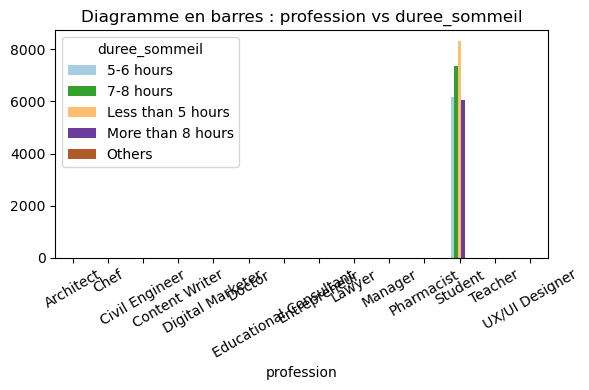

Khi-2 : stat = 39.354, p-value = 0.9016
Condition Cochran respectée ? False

--- profession vs habitudes_alimentaires ---
habitudes_alimentaires  Healthy  Moderate  Others  Unhealthy
profession                                                  
Architect                     2         3       0          3
Chef                          1         1       0          0
Civil Engineer                1         0       0          0
Content Writer                0         2       0          0
Digital Marketer              2         1       0          0
Doctor                        2         0       0          0
Educational Consultant        1         0       0          0
Entrepreneur                  0         1       0          0
Lawyer                        0         0       0          1
Manager                       1         0       0          0
Pharmacist                    1         0       0          1
Student                    7637      9910      12      10308
Teacher                 

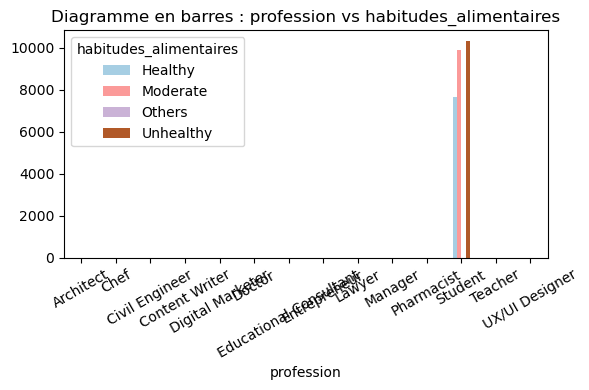

Khi-2 : stat = 27.966, p-value = 0.9056
Condition Cochran respectée ? False

--- profession vs diplome_suivi ---
diplome_suivi           B.Arch  B.Com  B.Ed  B.Pharm  B.Tech   BA  BBA   BCA  \
profession                                                                     
Architect                    1      0     0        0       0    0    1     0   
Chef                         0      0     0        0       0    0    0     0   
Civil Engineer               0      0     0        0       0    0    0     0   
Content Writer               0      0     1        0       0    0    0     0   
Digital Marketer             0      0     0        0       0    1    0     0   
Doctor                       0      0     0        0       0    0    0     0   
Educational Consultant       0      0     1        0       0    0    0     0   
Entrepreneur                 0      0     0        0       0    0    0     0   
Lawyer                       0      0     0        0       0    0    0     0   
Manager

C:\Users\KABA\AppData\Local\Temp\ipykernel_16956\533055273.py:15: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


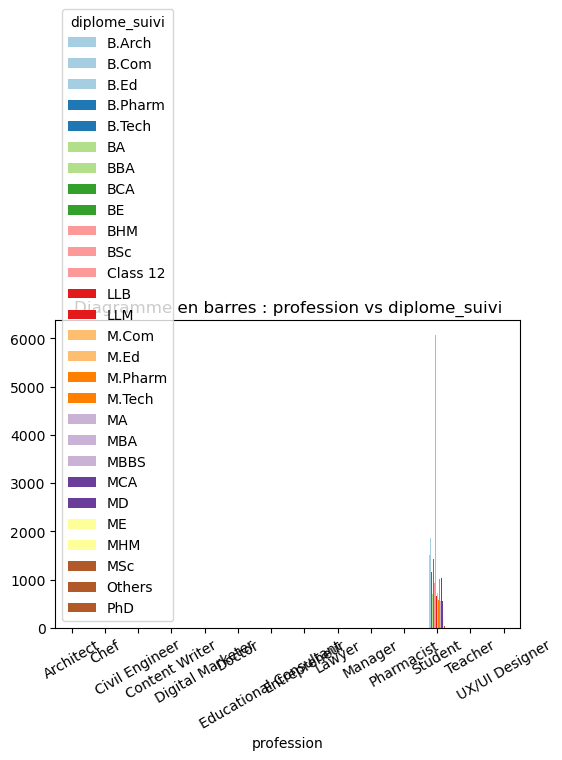

Khi-2 : stat = 507.514, p-value = 0.0000
Condition Cochran respectée ? False

--- profession vs pensees_suicidaire ---
pensees_suicidaire         No    Yes
profession                          
Architect                   3      5
Chef                        0      2
Civil Engineer              0      1
Content Writer              0      2
Digital Marketer            1      2
Doctor                      1      1
Educational Consultant      0      1
Entrepreneur                0      1
Lawyer                      0      1
Manager                     1      0
Pharmacist                  0      2
Student                 10236  17631
Teacher                     0      6
UX/UI Designer              0      1


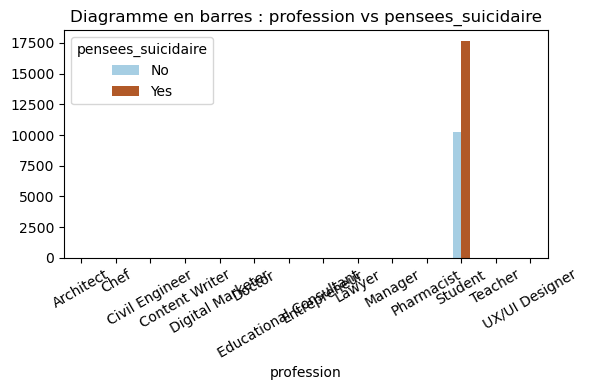

Khi-2 : stat = 11.759, p-value = 0.5475
Condition Cochran respectée ? False

--- profession vs antecedants_familiaux_maladie_mentale ---
antecedants_familiaux_maladie_mentale     No    Yes
profession                                         
Architect                                  1      7
Chef                                       1      1
Civil Engineer                             0      1
Content Writer                             1      1
Digital Marketer                           1      2
Doctor                                     2      0
Educational Consultant                     0      1
Entrepreneur                               1      0
Lawyer                                     1      0
Manager                                    1      0
Pharmacist                                 1      1
Student                                14383  13484
Teacher                                    3      3
UX/UI Designer                             1      0


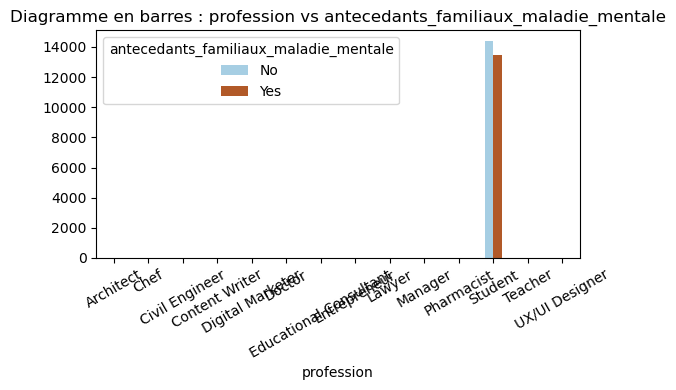

Khi-2 : stat = 13.072, p-value = 0.4423
Condition Cochran respectée ? False

--- duree_sommeil vs sexe ---
sexe               Female  Male
duree_sommeil                  
5-6 hours            2787  3394
7-8 hours            3291  4055
Less than 5 hours    3628  4681
More than 8 hours    2637  3407
Others                  9     9


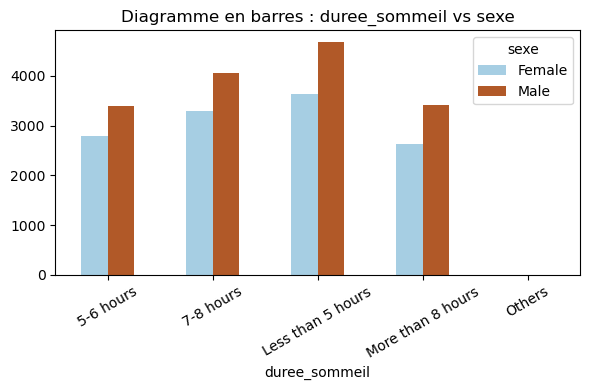

Khi-2 : stat = 5.001, p-value = 0.2872
Condition Cochran respectée ? True

--- duree_sommeil vs ville ---
ville              3.0  Agra  Ahmedabad  Bangalore  Bhavna  Bhopal  Chennai  \
duree_sommeil                                                                 
5-6 hours            0   231        184        178       1     237      199   
7-8 hours            1   289        262        169       0     256      222   
Less than 5 hours    0   316        272        217       1     248      256   
More than 8 hours    0   257        232        203       0     193      208   
Others               0     1          1          0       0       0        0   

ville              City  Delhi  Faridabad  ...  Reyansh  Saanvi  Srinagar  \
duree_sommeil                              ...                              
5-6 hours             0    147        117  ...        0       1       294   
7-8 hours             1    205        110  ...        1       0       376   
Less than 5 hours     1    227  

C:\Users\KABA\AppData\Local\Temp\ipykernel_16956\533055273.py:15: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


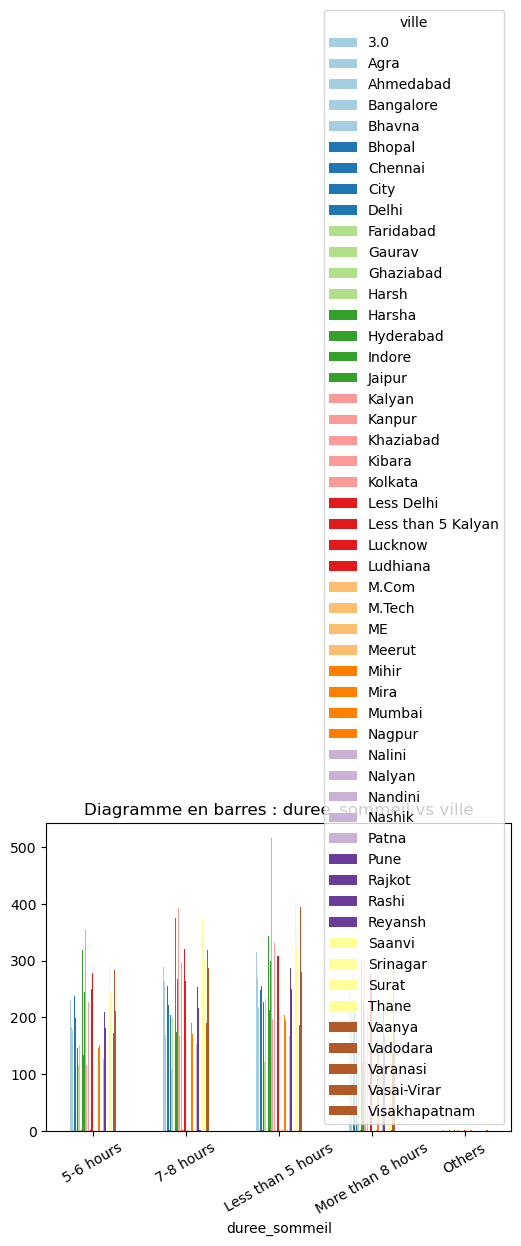

Khi-2 : stat = 260.956, p-value = 0.0043
Condition Cochran respectée ? False

--- duree_sommeil vs profession ---
profession         Architect  Chef  Civil Engineer  Content Writer  \
duree_sommeil                                                        
5-6 hours                  1     0               1               1   
7-8 hours                  1     2               0               1   
Less than 5 hours          2     0               0               0   
More than 8 hours          4     0               0               0   
Others                     0     0               0               0   

profession         Digital Marketer  Doctor  Educational Consultant  \
duree_sommeil                                                         
5-6 hours                         1       0                       0   
7-8 hours                         0       0                       1   
Less than 5 hours                 1       2                       0   
More than 8 hours                 1     

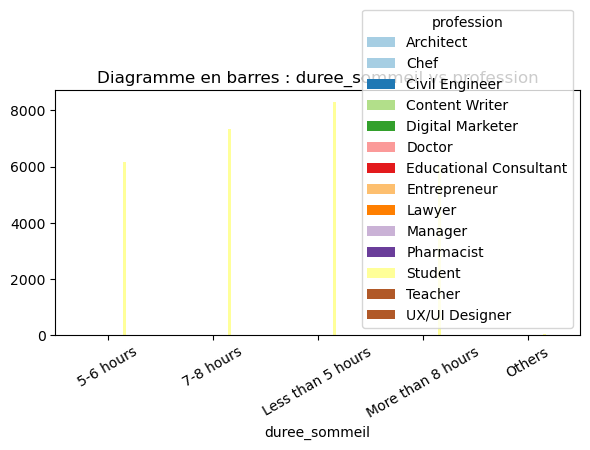

Khi-2 : stat = 39.354, p-value = 0.9016
Condition Cochran respectée ? False

--- duree_sommeil vs habitudes_alimentaires ---
habitudes_alimentaires  Healthy  Moderate  Others  Unhealthy
duree_sommeil                                               
5-6 hours                  1781      2217       3       2180
7-8 hours                  2008      2515       3       2820
Less than 5 hours          2197      3040       5       3067
More than 8 hours          1660      2142       1       2241
Others                        3         7       0          8


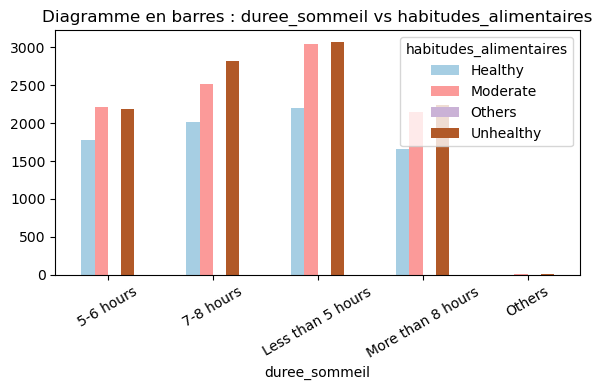

Khi-2 : stat = 25.138, p-value = 0.0142
Condition Cochran respectée ? False

--- duree_sommeil vs diplome_suivi ---
diplome_suivi      B.Arch  B.Com  B.Ed  B.Pharm  B.Tech   BA  BBA  BCA   BE  \
duree_sommeil                                                                 
5-6 hours             326    310   380      214     259  133  184  323  148   
7-8 hours             419    385   474      210     308  177  161  364  159   
Less than 5 hours     414    519   614      204     339  161  199  464  173   
More than 8 hours     317    291   397      182     246  126  152  281  131   
Others                  2      1     1        0       0    3    0    0    2   

diplome_suivi      BHM  ...   MA  MBA  MBBS  MCA   MD  ME  MHM  MSc  Others  \
duree_sommeil           ...                                                   
5-6 hours          223  ...  118  122   147  225  143  33   48  273       5   
7-8 hours          236  ...  157  151   181  293  160  59   55  304      10   
Less than 5 ho

C:\Users\KABA\AppData\Local\Temp\ipykernel_16956\533055273.py:15: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


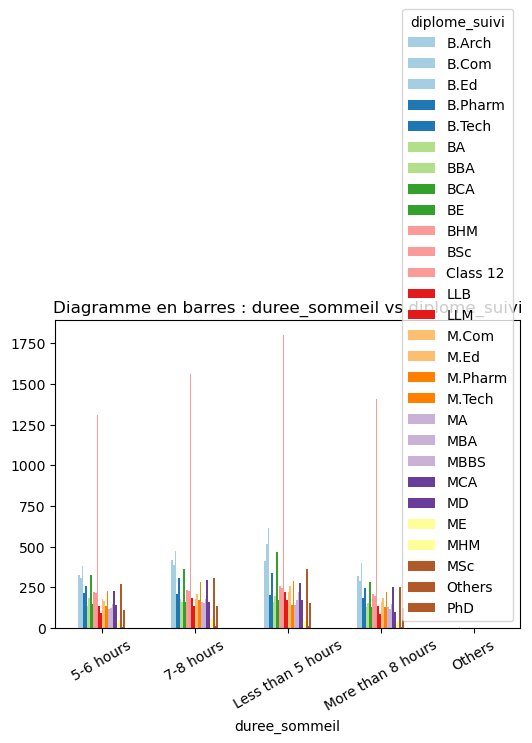

Khi-2 : stat = 191.545, p-value = 0.0000
Condition Cochran respectée ? True

--- duree_sommeil vs pensees_suicidaire ---
pensees_suicidaire    No   Yes
duree_sommeil                 
5-6 hours           2345  3836
7-8 hours           2573  4773
Less than 5 hours   2766  5543
More than 8 hours   2551  3493
Others                 7    11


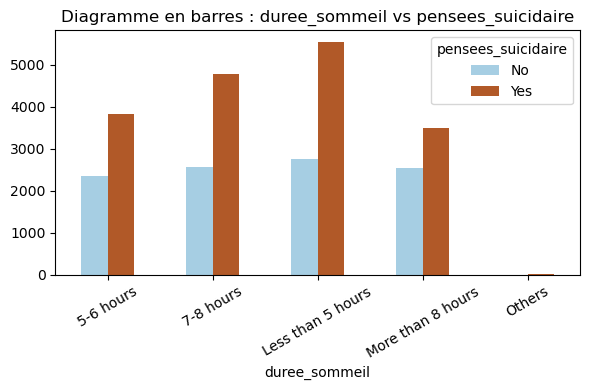

Khi-2 : stat = 133.477, p-value = 0.0000
Condition Cochran respectée ? True

--- duree_sommeil vs antecedants_familiaux_maladie_mentale ---
antecedants_familiaux_maladie_mentale    No   Yes
duree_sommeil                                    
5-6 hours                              3178  3003
7-8 hours                              3847  3499
Less than 5 hours                      4214  4095
More than 8 hours                      3148  2896
Others                                   10     8


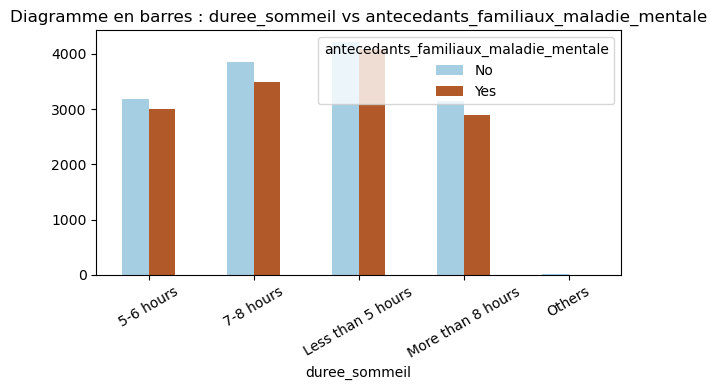

Khi-2 : stat = 5.102, p-value = 0.2770
Condition Cochran respectée ? True

--- habitudes_alimentaires vs sexe ---
sexe                    Female  Male
habitudes_alimentaires              
Healthy                   3622  4027
Moderate                  4582  5339
Others                       4     8
Unhealthy                 4144  6172


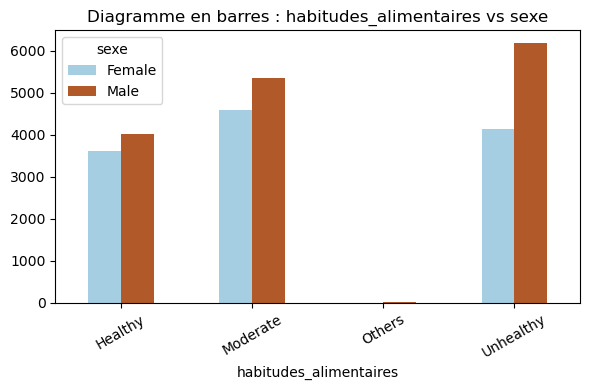

Khi-2 : stat = 115.050, p-value = 0.0000
Condition Cochran respectée ? True

--- habitudes_alimentaires vs ville ---
ville                   3.0  Agra  Ahmedabad  Bangalore  Bhavna  Bhopal  \
habitudes_alimentaires                                                    
Healthy                   0   319        235        197       1     262   
Moderate                  0   370        322        286       1     360   
Others                    0     1          2          1       0       0   
Unhealthy                 1   404        392        283       0     312   

ville                   Chennai  City  Delhi  Faridabad  ...  Reyansh  Saanvi  \
habitudes_alimentaires                                   ...                    
Healthy                     261     1    224        138  ...        0       1   
Moderate                    304     0    225        165  ...        0       0   
Others                        0     0      0          0  ...        0       0   
Unhealthy                  

C:\Users\KABA\AppData\Local\Temp\ipykernel_16956\533055273.py:15: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


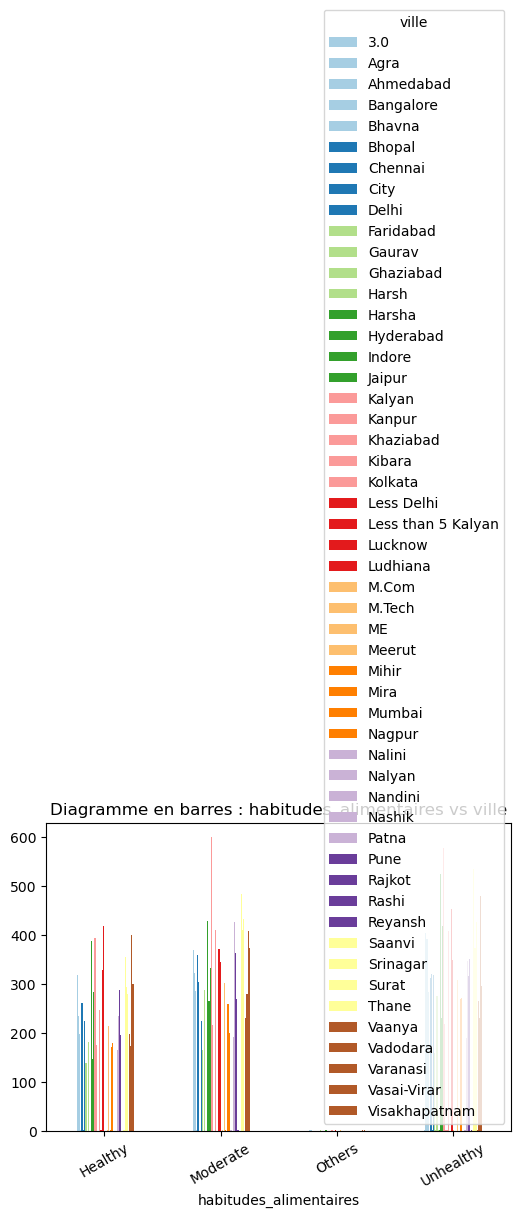

Khi-2 : stat = 319.907, p-value = 0.0000
Condition Cochran respectée ? False

--- habitudes_alimentaires vs profession ---
profession              Architect  Chef  Civil Engineer  Content Writer  \
habitudes_alimentaires                                                    
Healthy                         2     1               1               0   
Moderate                        3     1               0               2   
Others                          0     0               0               0   
Unhealthy                       3     0               0               0   

profession              Digital Marketer  Doctor  Educational Consultant  \
habitudes_alimentaires                                                     
Healthy                                2       2                       1   
Moderate                               1       0                       0   
Others                                 0       0                       0   
Unhealthy                              0      

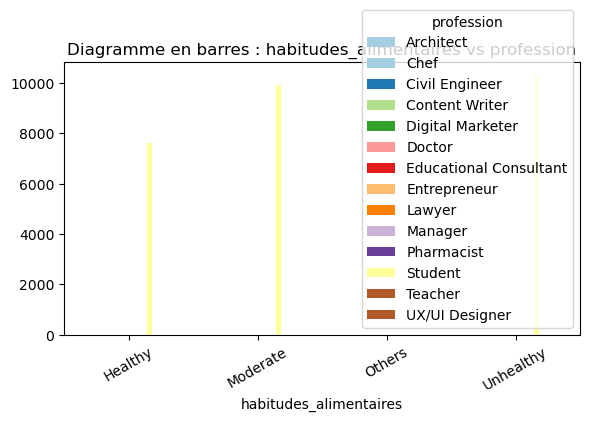

Khi-2 : stat = 27.966, p-value = 0.9056
Condition Cochran respectée ? False

--- habitudes_alimentaires vs duree_sommeil ---
duree_sommeil           5-6 hours  7-8 hours  Less than 5 hours  \
habitudes_alimentaires                                            
Healthy                      1781       2008               2197   
Moderate                     2217       2515               3040   
Others                          3          3                  5   
Unhealthy                    2180       2820               3067   

duree_sommeil           More than 8 hours  Others  
habitudes_alimentaires                             
Healthy                              1660       3  
Moderate                             2142       7  
Others                                  1       0  
Unhealthy                            2241       8  


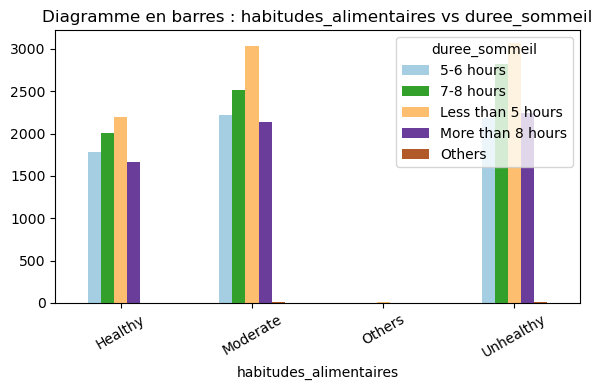

Khi-2 : stat = 25.138, p-value = 0.0142
Condition Cochran respectée ? False

--- habitudes_alimentaires vs diplome_suivi ---
diplome_suivi           B.Arch  B.Com  B.Ed  B.Pharm  B.Tech   BA  BBA  BCA  \
habitudes_alimentaires                                                        
Healthy                    358    404   484      218     285  171  222  391   
Moderate                   553    543   769      331     449  208  211  455   
Others                       0      1     1        1       1    0    0    1   
Unhealthy                  567    558   612      260     417  221  263  585   

diplome_suivi            BE  BHM  ...   MA  MBA  MBBS  MCA   MD  ME  MHM  MSc  \
habitudes_alimentaires            ...                                           
Healthy                 195  232  ...  204  169   213  307  166  56   56  342   
Moderate                219  311  ...  181  187   267  365  183  62   57  396   
Others                    0    0  ...    0    0     0    2    0   0    0    

C:\Users\KABA\AppData\Local\Temp\ipykernel_16956\533055273.py:15: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


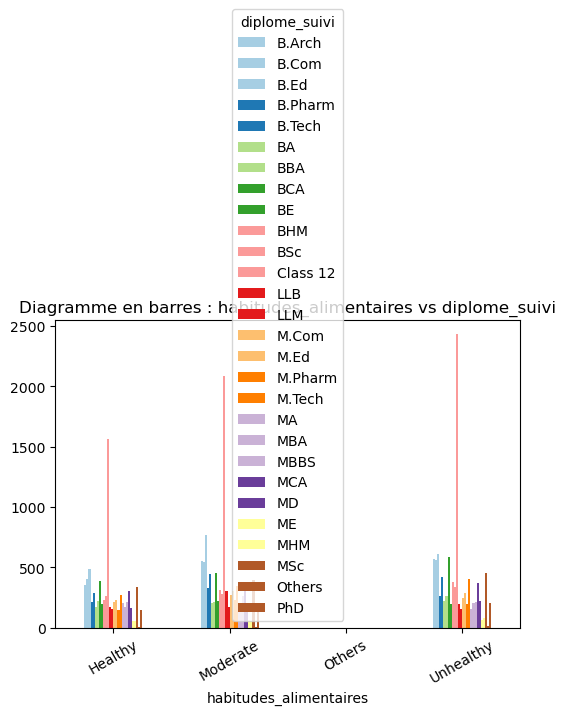

Khi-2 : stat = 248.497, p-value = 0.0000
Condition Cochran respectée ? False

--- habitudes_alimentaires vs pensees_suicidaire ---
pensees_suicidaire        No   Yes
habitudes_alimentaires            
Healthy                 3360  4289
Moderate                3751  6170
Others                     2    10
Unhealthy               3129  7187


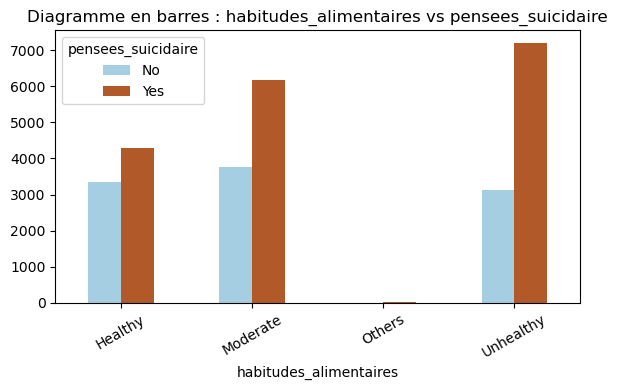

Khi-2 : stat = 359.354, p-value = 0.0000
Condition Cochran respectée ? True

--- habitudes_alimentaires vs antecedants_familiaux_maladie_mentale ---
antecedants_familiaux_maladie_mentale    No   Yes
habitudes_alimentaires                           
Healthy                                3951  3698
Moderate                               5163  4758
Others                                    9     3
Unhealthy                              5274  5042


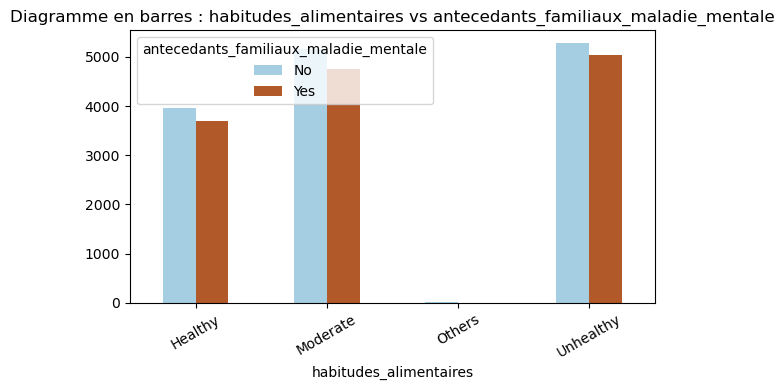

Khi-2 : stat = 4.347, p-value = 0.2264
Condition Cochran respectée ? True

--- diplome_suivi vs sexe ---
sexe           Female  Male
diplome_suivi              
B.Arch            730   748
B.Com             666   840
B.Ed              763  1103
B.Pharm           371   439
B.Tech            386   766
BA                305   295
BBA               331   365
BCA               610   822
BE                300   313
BHM               586   339
BSc               388   500
Class 12         2705  3375
LLB               292   379
LLM               218   264
M.Com             312   422
M.Ed              341   480
M.Pharm           205   377
M.Tech            397   625
MA                233   311
MBA               268   294
MBBS              351   344
MCA               456   588
MD                202   370
ME                 89    96
MHM                96    95
MSc               478   712
Others             16    19
PhD               257   265


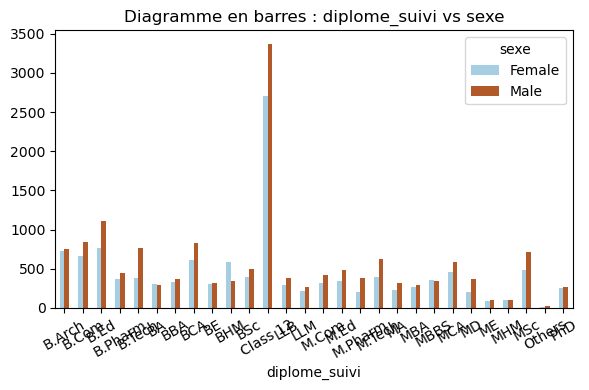

Khi-2 : stat = 321.812, p-value = 0.0000
Condition Cochran respectée ? True

--- diplome_suivi vs ville ---
ville          3.0  Agra  Ahmedabad  Bangalore  Bhavna  Bhopal  Chennai  City  \
diplome_suivi                                                                   
B.Arch           0    67         95         33       0      21       22     0   
B.Com            0    57         39         33       0      48       47     0   
B.Ed             0    80         62         45       0      66       30     0   
B.Pharm          0    46         13         23       0      19       23     0   
B.Tech           0    55         35         33       0      26       29     0   
BA               0    60         12         17       0       9       20     0   
BBA              0    36         17         18       0      20       23     0   
BCA              1    51         34         29       0      19       59     0   
BE               0    16         27         18       0      14       29     0   
B

C:\Users\KABA\AppData\Local\Temp\ipykernel_16956\533055273.py:15: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


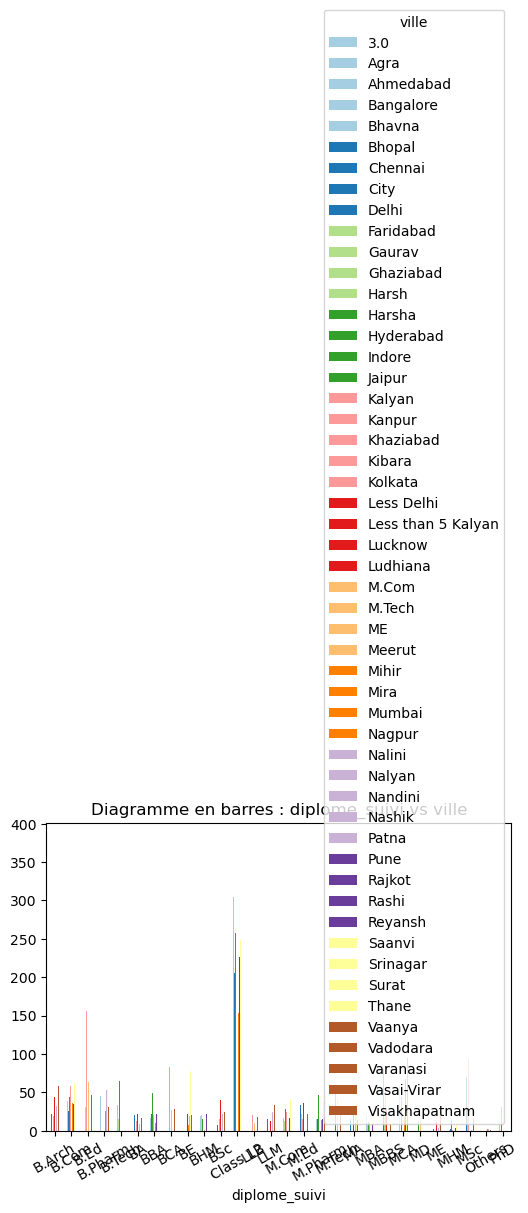

Khi-2 : stat = 4871.316, p-value = 0.0000
Condition Cochran respectée ? False

--- diplome_suivi vs profession ---
profession     Architect  Chef  Civil Engineer  Content Writer  \
diplome_suivi                                                    
B.Arch                 1     0               0               0   
B.Com                  0     0               0               0   
B.Ed                   0     0               0               1   
B.Pharm                0     0               0               0   
B.Tech                 0     0               0               0   
BA                     0     0               0               0   
BBA                    1     0               0               0   
BCA                    0     0               0               0   
BE                     0     0               0               0   
BHM                    0     2               0               0   
BSc                    3     0               0               0   
Class 12               0   

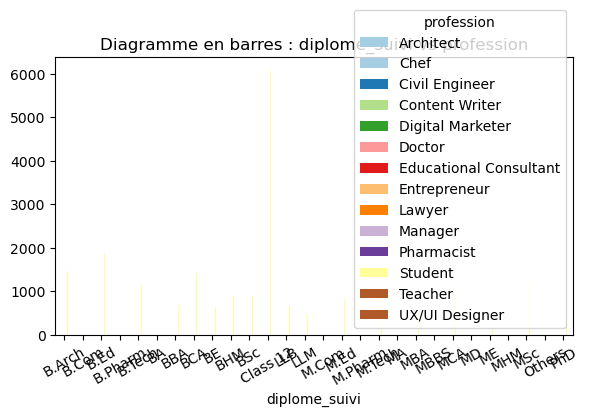

Khi-2 : stat = 507.514, p-value = 0.0000
Condition Cochran respectée ? False

--- diplome_suivi vs duree_sommeil ---
duree_sommeil  5-6 hours  7-8 hours  Less than 5 hours  More than 8 hours  \
diplome_suivi                                                               
B.Arch               326        419                414                317   
B.Com                310        385                519                291   
B.Ed                 380        474                614                397   
B.Pharm              214        210                204                182   
B.Tech               259        308                339                246   
BA                   133        177                161                126   
BBA                  184        161                199                152   
BCA                  323        364                464                281   
BE                   148        159                173                131   
BHM                  223        236 

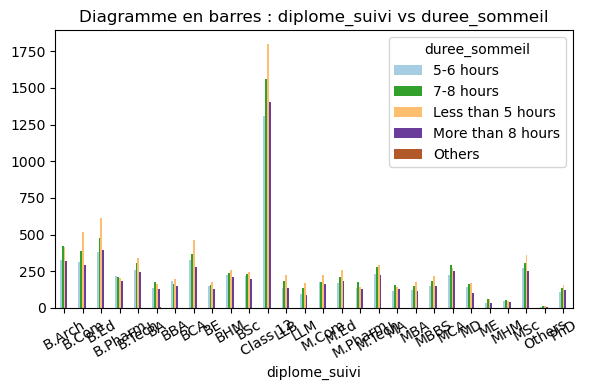

Khi-2 : stat = 191.545, p-value = 0.0000
Condition Cochran respectée ? True

--- diplome_suivi vs habitudes_alimentaires ---
habitudes_alimentaires  Healthy  Moderate  Others  Unhealthy
diplome_suivi                                               
B.Arch                      358       553       0        567
B.Com                       404       543       1        558
B.Ed                        484       769       1        612
B.Pharm                     218       331       1        260
B.Tech                      285       449       1        417
BA                          171       208       0        221
BBA                         222       211       0        263
BCA                         391       455       1        585
BE                          195       219       0        199
BHM                         232       311       0        382
BSc                         266       279       1        342
Class 12                   1565      2085       1       2429
LLB                  

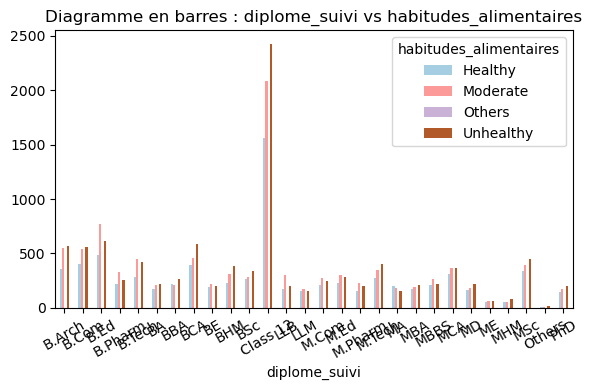

Khi-2 : stat = 248.497, p-value = 0.0000
Condition Cochran respectée ? False

--- diplome_suivi vs pensees_suicidaire ---
pensees_suicidaire    No   Yes
diplome_suivi                 
B.Arch               565   913
B.Com                554   952
B.Ed                 709  1157
B.Pharm              340   470
B.Tech               448   704
BA                   230   370
BBA                  255   441
BCA                  527   905
BE                   221   392
BHM                  359   566
BSc                  333   555
Class 12            1883  4197
LLB                  261   410
LLM                  191   291
M.Com                292   442
M.Ed                 352   469
M.Pharm              203   379
M.Tech               419   603
MA                   203   341
MBA                  215   347
MBBS                 261   434
MCA                  432   612
MD                   208   364
ME                    69   116
MHM                   69   122
MSc                  413   777
Others    

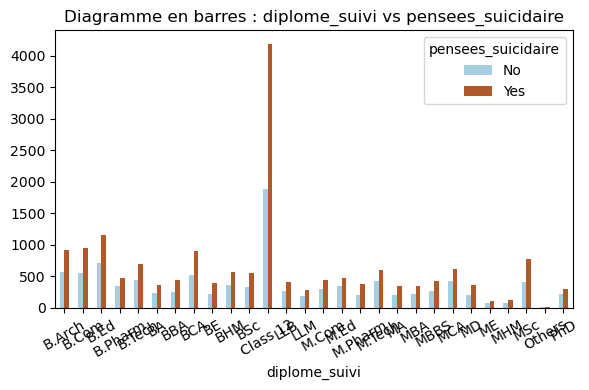

Khi-2 : stat = 150.190, p-value = 0.0000
Condition Cochran respectée ? True

--- diplome_suivi vs antecedants_familiaux_maladie_mentale ---
antecedants_familiaux_maladie_mentale    No   Yes
diplome_suivi                                    
B.Arch                                  753   725
B.Com                                   788   718
B.Ed                                    971   895
B.Pharm                                 418   392
B.Tech                                  650   502
BA                                      312   288
BBA                                     321   375
BCA                                     765   667
BE                                      318   295
BHM                                     492   433
BSc                                     475   413
Class 12                               3098  2982
LLB                                     337   334
LLM                                     246   236
M.Com                                   396   338
M.Ed      

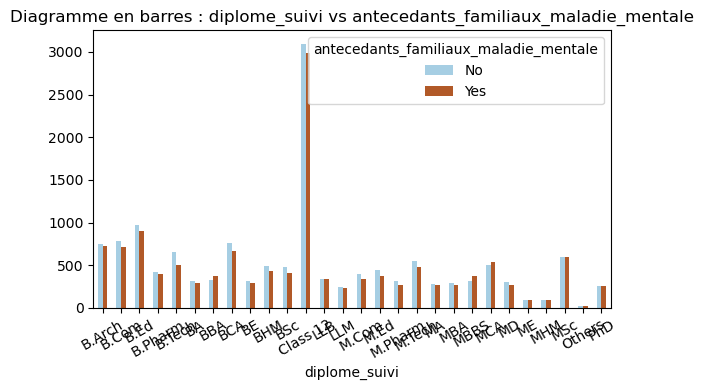

Khi-2 : stat = 48.069, p-value = 0.0075
Condition Cochran respectée ? True

--- pensees_suicidaire vs sexe ---
sexe                Female  Male
pensees_suicidaire              
No                    4526  5716
Yes                   7826  9830


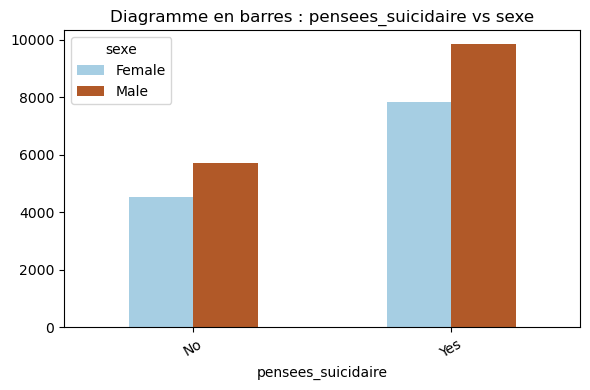

Khi-2 : stat = 0.042, p-value = 0.8374
Condition Cochran respectée ? True

--- pensees_suicidaire vs ville ---
ville               3.0  Agra  Ahmedabad  Bangalore  Bhavna  Bhopal  Chennai  \
pensees_suicidaire                                                             
No                    0   399        306        295       0     299      347   
Yes                   1   695        645        472       2     635      538   

ville               City  Delhi  Faridabad  ...  Reyansh  Saanvi  Srinagar  \
pensees_suicidaire                          ...                              
No                     2    310        161  ...        1       1       507   
Yes                    0    458        300  ...        0       1       865   

ville               Surat  Thane  Vaanya  Vadodara  Varanasi  Vasai-Virar  \
pensees_suicidaire                                                          
No                    396    398       0       254       272          494   
Yes                   68

C:\Users\KABA\AppData\Local\Temp\ipykernel_16956\533055273.py:15: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


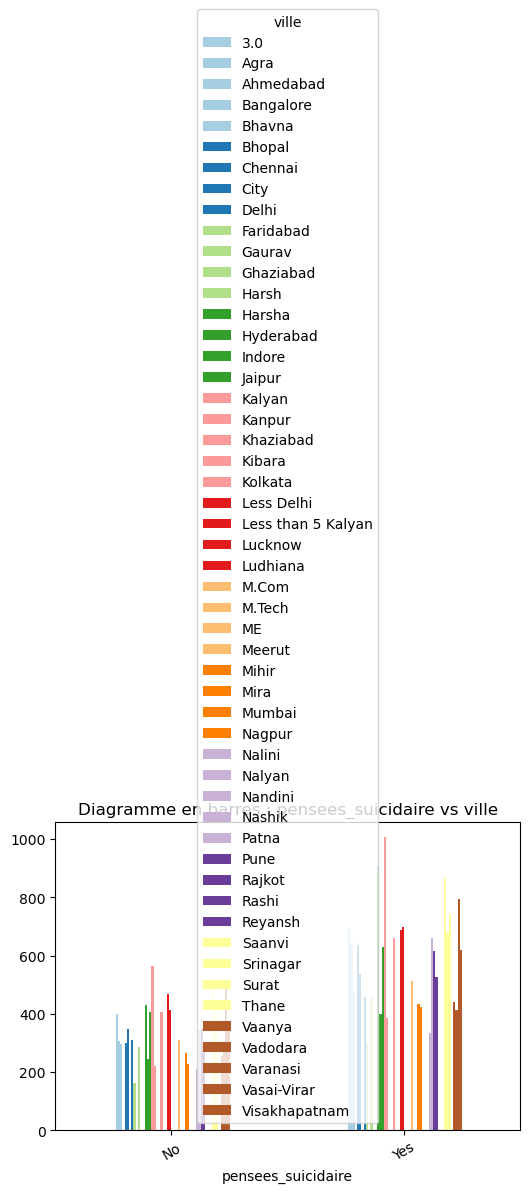

Khi-2 : stat = 84.933, p-value = 0.0020
Condition Cochran respectée ? False

--- pensees_suicidaire vs profession ---
profession          Architect  Chef  Civil Engineer  Content Writer  \
pensees_suicidaire                                                    
No                          3     0               0               0   
Yes                         5     2               1               2   

profession          Digital Marketer  Doctor  Educational Consultant  \
pensees_suicidaire                                                     
No                                 1       1                       0   
Yes                                2       1                       1   

profession          Entrepreneur  Lawyer  Manager  Pharmacist  Student  \
pensees_suicidaire                                                       
No                             0       0        1           0    10236   
Yes                            1       1        0           2    17631   

profession 

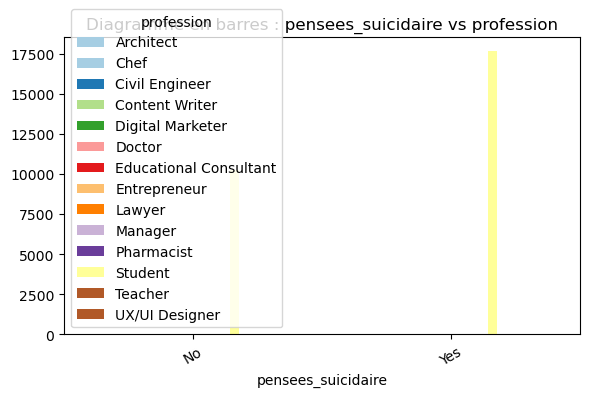

Khi-2 : stat = 11.759, p-value = 0.5475
Condition Cochran respectée ? False

--- pensees_suicidaire vs duree_sommeil ---
duree_sommeil       5-6 hours  7-8 hours  Less than 5 hours  \
pensees_suicidaire                                            
No                       2345       2573               2766   
Yes                      3836       4773               5543   

duree_sommeil       More than 8 hours  Others  
pensees_suicidaire                             
No                               2551       7  
Yes                              3493      11  


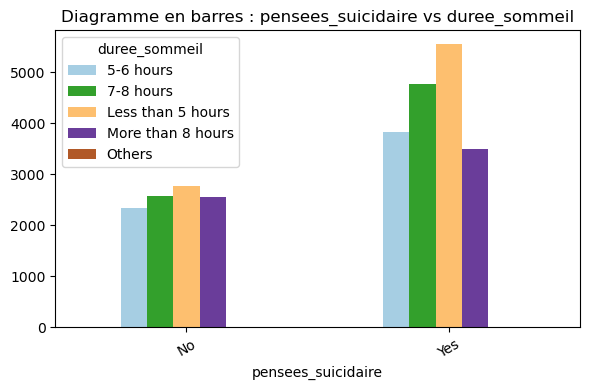

Khi-2 : stat = 133.477, p-value = 0.0000
Condition Cochran respectée ? True

--- pensees_suicidaire vs habitudes_alimentaires ---
habitudes_alimentaires  Healthy  Moderate  Others  Unhealthy
pensees_suicidaire                                          
No                         3360      3751       2       3129
Yes                        4289      6170      10       7187


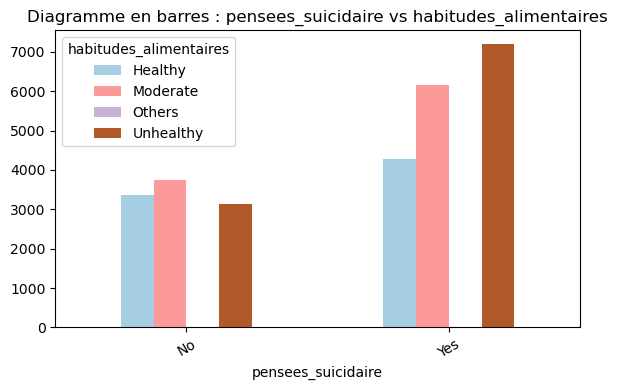

Khi-2 : stat = 359.354, p-value = 0.0000
Condition Cochran respectée ? True

--- pensees_suicidaire vs diplome_suivi ---
diplome_suivi       B.Arch  B.Com  B.Ed  B.Pharm  B.Tech   BA  BBA  BCA   BE  \
pensees_suicidaire                                                             
No                     565    554   709      340     448  230  255  527  221   
Yes                    913    952  1157      470     704  370  441  905  392   

diplome_suivi       BHM  ...   MA  MBA  MBBS  MCA   MD   ME  MHM  MSc  Others  \
pensees_suicidaire       ...                                                    
No                  359  ...  203  215   261  432  208   69   69  413      15   
Yes                 566  ...  341  347   434  612  364  116  122  777      20   

diplome_suivi       PhD  
pensees_suicidaire       
No                  215  
Yes                 307  

[2 rows x 28 columns]


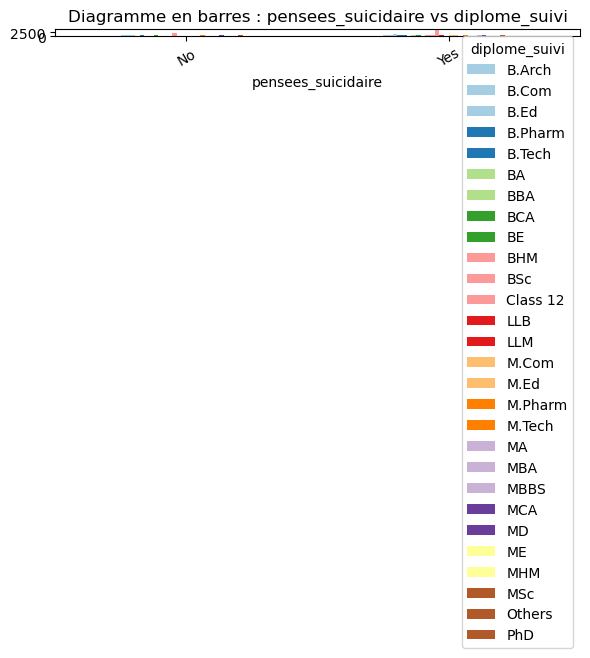

Khi-2 : stat = 150.190, p-value = 0.0000
Condition Cochran respectée ? True

--- pensees_suicidaire vs antecedants_familiaux_maladie_mentale ---
antecedants_familiaux_maladie_mentale    No   Yes
pensees_suicidaire                               
No                                     5462  4780
Yes                                    8935  8721


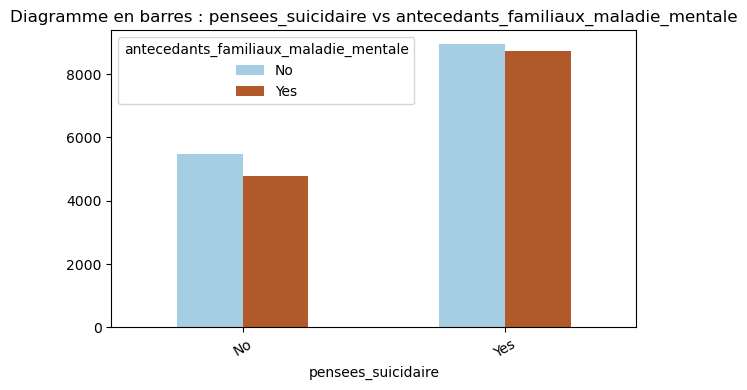

Khi-2 : stat = 19.141, p-value = 0.0000
Condition Cochran respectée ? True

--- antecedants_familiaux_maladie_mentale vs sexe ---
sexe                                   Female  Male
antecedants_familiaux_maladie_mentale              
No                                       6265  8132
Yes                                      6087  7414


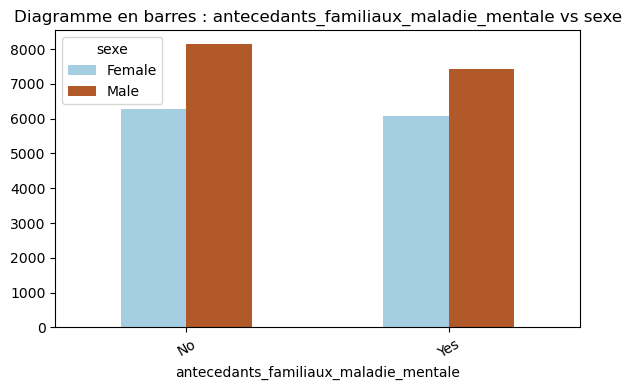

Khi-2 : stat = 6.893, p-value = 0.0087
Condition Cochran respectée ? True

--- antecedants_familiaux_maladie_mentale vs ville ---
ville                                  3.0  Agra  Ahmedabad  Bangalore  \
antecedants_familiaux_maladie_mentale                                    
No                                       1   572        490        391   
Yes                                      0   522        461        376   

ville                                  Bhavna  Bhopal  Chennai  City  Delhi  \
antecedants_familiaux_maladie_mentale                                         
No                                          1     458      458     1    394   
Yes                                         1     476      427     1    374   

ville                                  Faridabad  ...  Reyansh  Saanvi  \
antecedants_familiaux_maladie_mentale             ...                    
No                                           234  ...        1       1   
Yes                               

C:\Users\KABA\AppData\Local\Temp\ipykernel_16956\533055273.py:15: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


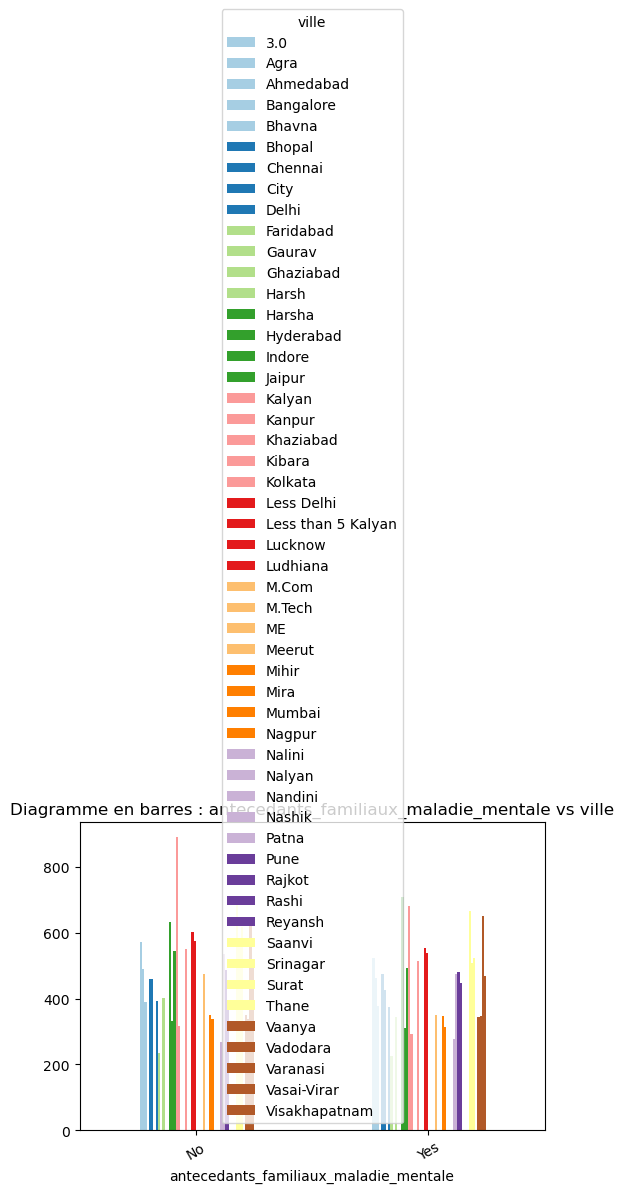

Khi-2 : stat = 87.349, p-value = 0.0012
Condition Cochran respectée ? False

--- antecedants_familiaux_maladie_mentale vs profession ---
profession                             Architect  Chef  Civil Engineer  \
antecedants_familiaux_maladie_mentale                                    
No                                             1     1               0   
Yes                                            7     1               1   

profession                             Content Writer  Digital Marketer  \
antecedants_familiaux_maladie_mentale                                     
No                                                  1                 1   
Yes                                                 1                 2   

profession                             Doctor  Educational Consultant  \
antecedants_familiaux_maladie_mentale                                   
No                                          2                       0   
Yes                                         0 

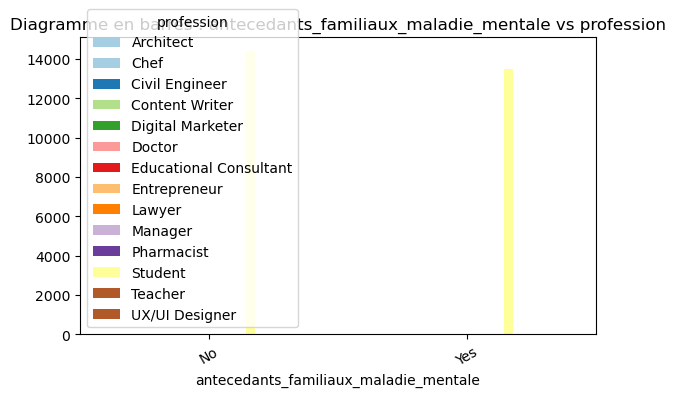

Khi-2 : stat = 13.072, p-value = 0.4423
Condition Cochran respectée ? False

--- antecedants_familiaux_maladie_mentale vs duree_sommeil ---
duree_sommeil                          5-6 hours  7-8 hours  \
antecedants_familiaux_maladie_mentale                         
No                                          3178       3847   
Yes                                         3003       3499   

duree_sommeil                          Less than 5 hours  More than 8 hours  \
antecedants_familiaux_maladie_mentale                                         
No                                                  4214               3148   
Yes                                                 4095               2896   

duree_sommeil                          Others  
antecedants_familiaux_maladie_mentale          
No                                         10  
Yes                                         8  


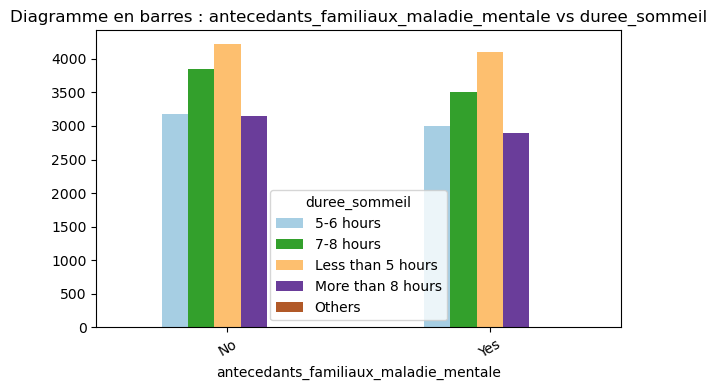

Khi-2 : stat = 5.102, p-value = 0.2770
Condition Cochran respectée ? True

--- antecedants_familiaux_maladie_mentale vs habitudes_alimentaires ---
habitudes_alimentaires                 Healthy  Moderate  Others  Unhealthy
antecedants_familiaux_maladie_mentale                                      
No                                        3951      5163       9       5274
Yes                                       3698      4758       3       5042


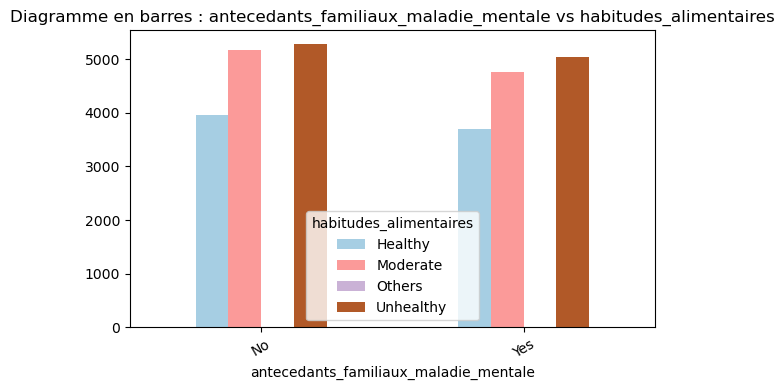

Khi-2 : stat = 4.347, p-value = 0.2264
Condition Cochran respectée ? True

--- antecedants_familiaux_maladie_mentale vs diplome_suivi ---
diplome_suivi                          B.Arch  B.Com  B.Ed  B.Pharm  B.Tech  \
antecedants_familiaux_maladie_mentale                                         
No                                        753    788   971      418     650   
Yes                                       725    718   895      392     502   

diplome_suivi                           BA  BBA  BCA   BE  BHM  ...   MA  MBA  \
antecedants_familiaux_maladie_mentale                           ...             
No                                     312  321  765  318  492  ...  276  294   
Yes                                    288  375  667  295  433  ...  268  268   

diplome_suivi                          MBBS  MCA   MD  ME  MHM  MSc  Others  \
antecedants_familiaux_maladie_mentale                                         
No                                      317  505  299  92   96

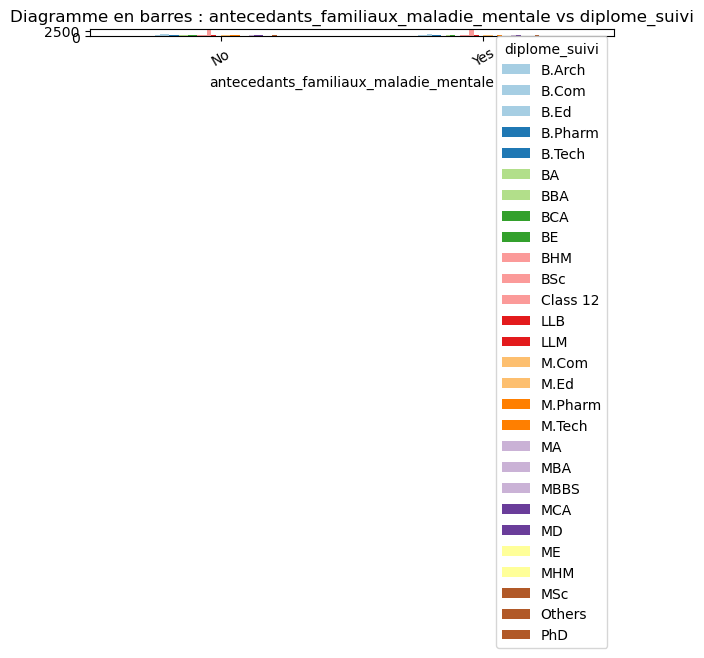

Khi-2 : stat = 48.069, p-value = 0.0075
Condition Cochran respectée ? True

--- antecedants_familiaux_maladie_mentale vs pensees_suicidaire ---
pensees_suicidaire                       No   Yes
antecedants_familiaux_maladie_mentale            
No                                     5462  8935
Yes                                    4780  8721


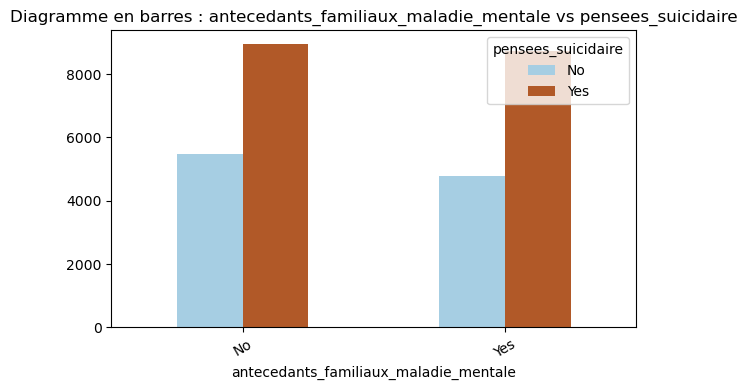

Khi-2 : stat = 19.141, p-value = 0.0000
Condition Cochran respectée ? True


In [39]:
from scipy.stats import chi2_contingency, fisher_exact

for qual in qual_vars:
    for qual2 in qual_vars:
        if qual != qual2:
            # Contingency table
            ct = pd.crosstab(df[qual], df[qual2])
            print(f"\n--- {qual} vs {qual2} ---")
            print(ct)
            
            # Barplot
            ct.plot(kind='bar', stacked=False, figsize=(6,4), colormap='Paired')
            plt.title(f"Diagramme en barres : {qual} vs {qual2}")
            plt.xticks(rotation=30)
            plt.tight_layout()
            plt.show()
            
            # Khi-2 test
            chi2, p, dof, expected = chi2_contingency(ct)
            print(f"Khi-2 : stat = {chi2:.3f}, p-value = {p:.4f}")
            
            # Condition Cochran (minimum 80% effectifs théoriques > 5)
            cochran_ok = (expected >= 5).sum() / expected.size >= 0.8
            print(f"Condition Cochran respectée ? {cochran_ok}")


In [43]:
import pandas as pd
import numpy as np
from scipy.stats import shapiro, kstest, normaltest
import matplotlib.pyplot as plt
import seaborn as sns



results = []

for var in quanti_vars:
    data = df[var].dropna()
    if len(data) > 3:  # au moins 3 valeurs pour le test
        stat_shapiro, p_shapiro = shapiro(data)
        stat_ks, p_ks = kstest(data, 'norm', args=(data.mean(), data.std()))
        results.append({
            'Variable': var,
            'Shapiro_p_value': p_shapiro,
            'KS_p_value': p_ks,
            'Conclusion': 'Normale' if p_shapiro > 0.05 and p_ks > 0.05 else 'Non Normale'
        })

# Afficher sous forme de tableau
result_df = pd.DataFrame(results)
display(result_df)


C:\Users\KABA\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 27898.
  res = hypotest_fun_out(*samples, **kwds)
C:\Users\KABA\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: Input data has range zero. The results may not be accurate.
  res = hypotest_fun_out(*samples, **kwds)
C:\Users\KABA\anaconda3\Lib\site-packages\scipy\stats\_distn_infrastructure.py:2071: RuntimeWarning: invalid value encountered in divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)


Variable  Shapiro_p_value     KS_p_value   Conclusion
0                         age     1.076839e-69  2.869665e-211  Non Normale
1         pression_academique     4.381524e-86   0.000000e+00  Non Normale
2    pression_liee_au_travail     1.000000e+00            NaN  Non Normale
3               moyenne_notes     1.838519e-73  4.703319e-158  Non Normale
4         satisfaction_etudes     9.614165e-85   0.000000e+00  Non Normale
5        satisfaction_travail     1.000000e+00            NaN  Non Normale
6  nombre_heure_travail_etude     1.524737e-78   0.000000e+00  Non Normale
7            stress_financier     2.828171e-88   0.000000e+00  Non Normale
8                  depression    2.124143e-117   0.000000e+00  Non Normale

In [47]:
from itertools import combinations
import pandas as pd
import scipy.stats as stats

# Listes de résultats
cochran_ok = []
cochran_not_ok = []

# Analyse de toutes les combinaisons de variables qualitatives
for var1, var2 in combinations(qual_vars, 2):
    try:
        # Tableau de contingence
        contingency = pd.crosstab(df[var1], df[var2])

        # Test du khi-deux pour obtenir les effectifs théoriques
        chi2, p, dof, expected = stats.chi2_contingency(contingency)
        expected_df = pd.DataFrame(expected, index=contingency.index, columns=contingency.columns)

        # Vérification de la condition de Cochran : % d'effectifs théoriques >= 5
        cochran_percent = (expected_df.values >= 5).sum() / expected_df.size * 100

        # Tri selon la condition de Cochran
        if cochran_percent >= 80:
            cochran_ok.append((var1, var2))
        else:
            cochran_not_ok.append((var1, var2))
    
    except Exception as e:
        print(f"⚠️ Erreur pour {var1} vs {var2} : {e}")

# Résultats
print("\n✅ Paires respectant la condition de Cochran (≥ 80%) :")
for pair in cochran_ok:
    print(f" - {pair[0]} vs {pair[1]}")

print("\n❌ Paires NE respectant PAS la condition de Cochran (< 80%) :")
for pair in cochran_not_ok:
    print(f" - {pair[0]} vs {pair[1]}")



✅ Paires respectant la condition de Cochran (≥ 80%) :
 - sexe vs duree_sommeil
 - sexe vs habitudes_alimentaires
 - sexe vs diplome_suivi
 - sexe vs pensees_suicidaire
 - sexe vs antecedants_familiaux_maladie_mentale
 - duree_sommeil vs diplome_suivi
 - duree_sommeil vs pensees_suicidaire
 - duree_sommeil vs antecedants_familiaux_maladie_mentale
 - habitudes_alimentaires vs pensees_suicidaire
 - habitudes_alimentaires vs antecedants_familiaux_maladie_mentale
 - diplome_suivi vs pensees_suicidaire
 - diplome_suivi vs antecedants_familiaux_maladie_mentale
 - pensees_suicidaire vs antecedants_familiaux_maladie_mentale

❌ Paires NE respectant PAS la condition de Cochran (< 80%) :
 - sexe vs ville
 - sexe vs profession
 - ville vs profession
 - ville vs duree_sommeil
 - ville vs habitudes_alimentaires
 - ville vs diplome_suivi
 - ville vs pensees_suicidaire
 - ville vs antecedants_familiaux_maladie_mentale
 - profession vs duree_sommeil
 - profession vs habitudes_alimentaires
 - profession

In [53]:
from itertools import combinations
import pandas as pd
import scipy.stats as stats

# DataFrame pour stocker les résultats
cochran_results = []

# Boucle sur chaque paire de variables qualitatives
for var1, var2 in combinations(qual_vars, 2):
    try:
        # Création du tableau de contingence
        contingency = pd.crosstab(df[var1], df[var2])

        # Test du Chi² avec récupération des effectifs théoriques
        chi2, p, dof, expected = stats.chi2_contingency(contingency)
        expected_df = pd.DataFrame(expected, index=contingency.index, columns=contingency.columns)

        # Calcul du % de cellules avec effectif théorique >= 5
        nb_total = expected_df.size
        nb_suffisant = (expected_df.values >= 5).sum()
        pourcentage = (nb_suffisant / nb_total) * 100
        cochran_status = "✅ Respectée" if pourcentage >= 80 else "❌ Non respectée"

        # Stockage dans la liste de résultats
        cochran_results.append({
            "Var1": var1,
            "Var2": var2,
            "Effectifs ≥ 5 (%)": round(pourcentage, 2),
            "Cochran": cochran_status,
            "Effectifs théoriques": expected_df.to_string()
        })

    except Exception as e:
        print(f"⚠️ Erreur avec {var1} vs {var2} : {e}")

# Création du tableau récapitulatif
cochran_summary = pd.DataFrame(cochran_results)

# Affichage du tableau final
print("\n📊 RÉCAPITULATIF DES PAIRS AVEC EFFECTIFS THÉORIQUES ET CONDITION DE COCHRAN")
display(cochran_summary)  # Pour Jupyter. Sinon : print(cochran_summary.to_string())



📊 RÉCAPITULATIF DES PAIRS AVEC EFFECTIFS THÉORIQUES ET CONDITION DE COCHRAN


Var1                                   Var2  \
0                     sexe                                  ville   
1                     sexe                             profession   
2                     sexe                          duree_sommeil   
3                     sexe                 habitudes_alimentaires   
4                     sexe                          diplome_suivi   
5                     sexe                     pensees_suicidaire   
6                     sexe  antecedants_familiaux_maladie_mentale   
7                    ville                             profession   
8                    ville                          duree_sommeil   
9                    ville                 habitudes_alimentaires   
10                   ville                          diplome_suivi   
11                   ville                     pensees_suicidaire   
12                   ville  antecedants_familiaux_maladie_mentale   
13              profession                          duree_sommeil   
14              profession                 habitudes_alimentaires   
15              profession                          diplome_suivi   
16              profession                     pensees_suicidaire   
17              profession  antecedants_familiaux_maladie_mentale   
18           duree_sommeil                 habitudes_alimentaires   
19           duree_sommeil                          diplome_suivi   
20           duree_sommeil                     pensees_suicidaire   
21           duree_sommeil  antecedants_familiaux_maladie_mentale   
22  habitudes_alimentaires                          diplome_suivi   
23  habitudes_alimentaires                     pensees_suicidaire   
24  habitudes_alimentaires  antecedants_familiaux_maladie_mentale   
25           diplome_suivi                     pensees_suicidaire   
26           diplome_suivi  antecedants_familiaux_maladie_mentale   
27      pensees_suicidaire  antecedants_familiaux_maladie_mentale   

    Effectifs ≥ 5 (%)          Cochran  \
0               57.69  ❌ Non respectée   
1                7.14  ❌ Non respectée   
2              100.00      ✅ Respectée   
3              100.00      ✅ Respectée   
4              100.00      ✅ Respectée   
5              100.00      ✅ Respectée   
6              100.00      ✅ Respectée   
7                4.12  ❌ Non respectée   
8               46.15  ❌ Non respectée   
9               43.27  ❌ Non respectée   
10              54.46  ❌ Non respectée   
11              57.69  ❌ Non respectée   
12              57.69  ❌ Non respectée   
13               7.14  ❌ Non respectée   
14               7.14  ❌ Non respectée   
15               7.14  ❌ Non respectée   
16              10.71  ❌ Non respectée   
17               7.14  ❌ Non respectée   
18              70.00  ❌ Non respectée   
19              80.00      ✅ Respectée   
20             100.00      ✅ Respectée   
21             100.00      ✅ Respectée   
22              75.00  ❌ Non respectée   
23              87.50      ✅ Respectée   
24             100.00      ✅ Respectée   
25             100.00      ✅ Respectée   
26             100.00      ✅ Respectée   
27             100.00      ✅ Respectée   

                                 Effectifs théoriques  
0   ville        3.0        Agra   Ahmedabad   Ban...  
1   profession  Architect      Chef  Civil Enginee...  
2   duree_sommeil   5-6 hours    7-8 hours  Less t...  
3   habitudes_alimentaires      Healthy     Modera...  
4   diplome_suivi      B.Arch       B.Com         ...  
5   pensees_suicidaire           No          Yes\n...  
6   antecedants_familiaux_maladie_mentale         ...  
7   profession          Architect      Chef  Civil...  
8   duree_sommeil        5-6 hours   7-8 hours  Le...  
9   habitudes_alimentaires     Healthy    Moderate...  
10  diplome_suivi          B.Arch      B.Com      ...  
11  pensees_suicidaire          No         Yes\nvi...  
12  antecedants_familiaux_maladie_mentale         ...  
13  duree_sommeil